In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import json
import datetime
pd.set_option('display.max_columns', 500)

In [2]:
#Upload all the data
with open('../EDA/All_clean_data/EXPERIENCE_SAMPLING_R00_DND_NO_MISSING_DATA.pickle', 'rb') as file:
    EXP = pickle.load(file)
    
with open('../EDA/All_clean_data/HR_R00_DND.pickle', 'rb') as file:
    HR = pickle.load(file)
  

In [7]:
  
with open('../EDA/All_clean_data/SLEEP_R00_DND.pickle', 'rb') as file:
    SLEEP = pickle.load(file)
    
with open('../EDA/All_clean_data/SURVEY_R00_DND.pickle', 'rb') as file:
    SURVEY = pickle.load(file)
    

In [3]:
with open('../EDA/All_clean_data/STEPS_R00_DND.pickle', 'rb') as handle:
    STEPS = pickle.load(handle)

There was an issue with the subject ID from HR. I modified that and I create a new pickle version of the DF. This was the code:

`HR['ID'] = HR['ID'].replace(to_replace = '(DND1)' , value = 'DND', regex = True)
with open('./All_clean_data/HR_R00_DND.pickle','wb') as file:
    pickle.dump(HR,file)`

In [9]:
EXP

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,DATE,Period_of_day,VALENCE,VALENCE_mean,Date_only_date
0,1047,2.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-19 13:49:36,1,R00,0219,Evening,6.0,2.000000,2016-02-19
1,1047,2.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,2016-02-20 07:32:33,2,R00,0220,Morning,2.0,0.666667,2016-02-20
2,1047,3.0,3.0,1.0,1.0,3.0,5.0,1.0,1.0,2016-02-20 15:39:23,3,R00,0220,Evening,8.0,2.666667,2016-02-20
3,1047,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-20 21:13:34,4,R00,0220,Night,8.0,2.666667,2016-02-20
4,1047,4.0,1.0,1.0,2.0,4.0,2.0,1.0,1.0,2016-02-21 07:11:48,5,R00,0221,Morning,3.0,1.000000,2016-02-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,DND121,2.0,1.0,4.0,2.0,2.0,1.0,4.0,1.0,2018-04-01 18:00:19,27,DND,0401,Night,-6.0,-2.000000,2018-04-01
3079,DND121,2.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,2018-04-01 23:42:54,28,DND,0401,Night,-5.0,-1.666667,2018-04-01
3080,DND121,1.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2018-04-02 16:47:21,29,DND,0402,Evening,-3.0,-1.000000,2018-04-02
3081,DND121,2.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,2018-04-02 16:47:27,30,DND,0402,Evening,4.0,1.333333,2018-04-02


## Survey is a dictionary of datasets.
## I am going to create a loop to merge all my tables into one big DF

In [91]:
# Features that we are going to use in our model
features = {'AVI' : ['Experiment',
                     'HAN_actual', 'HAN_ideal', 
                     'HAP_actual', 'HAP_ideal',
                     'HA_actual', 'HA_ideal',
                     'LAN_actual', 'LAN_ideal',
                     'LAP_actual', 'LAP_ideal',
                     'LA_actual', 'LA_ideal',
                     'N_actual', 'N_ideal',
                     'P_actual', 'P_ideal',
                     'Subject'],
            'DEMOGRAPHICS' : ['Age',
                             'Children',
                             'Ethnicity',
                             'Experiment',
                             'Household_income',
                             'Marital_Status',
                             'Sex',
                             'Subject'],
            'MEDICAL_SCREENING' : ['BMI',
                                    'Experiment',
                                    'Height (cm)',
                                    'Subject',
                                    'Weight (kg)'],
            'BISBAS' : ['BAS_D', 'BAS_FS', 'BAS_RR', 'BIS.5', 'Experiment', 'Subject'],
            'BIS' : ['BIS_total', 'Experiment', 'Subject'],
            'TPQ_NS' : ['Experiment', 'NS_total', 'Subject'],
            'NEO_SF' : ['Conscientiousness_scaled', 'Experiment', 'Extraversion_scaled', 'Neuroticism_scaled', 'Subject'],
            'SWLS' : ['Experiment', 'SWLS', 'Subject'],    
            'FTP' : ['Experiment', 'FTP', 'Subject'],
            'SBQ' : ['Experiment','SBQ','Subject']}
features.keys() == SURVEY.keys()

True

In [92]:
#Merging all the tables into one DF
SURVEY_SMALL = SURVEY['AVI'].loc[:,features['AVI']].copy()
SURVEY_SMALL

,Experiment,HAN_actual,HAN_ideal,HAP_actual,HAP_ideal,HA_actual,HA_ideal,LAN_actual,LAN_ideal,LAP_actual,LAP_ideal,LA_actual,LA_ideal,N_actual,N_ideal,P_actual,P_ideal,Subject
1,R00,2.000000,1.000000,3.6,4.0,2.000000,3.333333,2.000000,1.0,3.8,4.8,2.4,2.0,2.000000,1.000000,4.000000,5.000000,1002
3,R00,1.333333,1.666667,2.8,4.4,2.666667,3.333333,2.333333,2.0,2.2,4.0,2.0,2.2,2.000000,1.333333,3.000000,4.333333,1004
7,R00,1.666667,1.000000,2.2,3.2,2.000000,2.000000,2.000000,1.0,2.2,4.0,2.0,2.0,1.666667,1.000000,3.333333,5.000000,1008
8,R00,1.333333,1.666667,3.8,3.8,2.333333,2.666667,2.000000,2.0,3.0,3.4,2.4,2.4,1.666667,2.000000,3.666667,3.666667,1009
13,R00,1.666667,1.333333,3.4,3.8,2.333333,2.333333,1.666667,1.0,3.8,4.2,1.4,1.4,1.666667,1.000000,4.000000,4.000000,1014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,DND,5.000000,3.000000,12.0,17.0,7.000000,8.000000,6.000000,3.0,13.0,16.0,5.0,5.0,6.000000,3.000000,7.000000,12.000000,DND118
118,DND,3.000000,3.000000,12.0,15.0,8.000000,10.000000,6.000000,5.0,18.0,18.0,8.0,7.0,3.000000,4.000000,12.000000,12.000000,DND119
119,DND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DND120
120,DND,6.000000,3.000000,16.0,18.0,7.000000,9.000000,8.000000,4.0,18.0,24.0,8.0,9.0,10.000000,3.000000,11.000000,15.000000,DND121


In [93]:
for table in list(features.keys())[1:]:
    print(table)
    SURVEY[table]['Subject'] = SURVEY[table]['Subject'].astype(str) #make subjects a string
    SURVEY_SMALL = SURVEY_SMALL.merge(SURVEY[table].loc[:,features[table]], how = 'left', on = ['Subject','Experiment'])

DEMOGRAPHICS
MEDICAL_SCREENING
BISBAS
BIS
TPQ_NS
NEO_SF
SWLS
FTP
SBQ


In [94]:
SURVEY_SMALL

,Experiment,HAN_actual,HAN_ideal,HAP_actual,HAP_ideal,HA_actual,HA_ideal,LAN_actual,LAN_ideal,LAP_actual,LAP_ideal,LA_actual,LA_ideal,N_actual,N_ideal,P_actual,P_ideal,Subject,Age,Children,Ethnicity,Household_income,Marital_Status,Sex,BMI,Height (cm),Weight (kg),BAS_D,BAS_FS,BAS_RR,BIS.5,BIS_total,NS_total,Conscientiousness_scaled,Extraversion_scaled,Neuroticism_scaled,SWLS,FTP,SBQ
0,R00,2.000000,1.000000,3.6,4.0,2.000000,3.333333,2.000000,1.0,3.8,4.8,2.4,2.0,2.000000,1.000000,4.000000,5.000000,1002,32.0,0.0,White,"$10,000-$19,999",Single,Female,23.725936,161.000000,61.5,15.0,16.0,24.0,21.0,55.0,16.0,0.708333,0.750000,0.291667,20.0,6.8,55.0
1,R00,1.333333,1.666667,2.8,4.4,2.666667,3.333333,2.333333,2.0,2.2,4.0,2.0,2.2,2.000000,1.333333,3.000000,4.333333,1004,28.0,0.0,White/Pacific Islander,"$10,000-$19,999",Single,Male,30.221958,174.000000,91.5,14.0,18.0,25.0,22.0,67.0,18.0,0.770833,0.750000,0.333333,25.0,5.3,45.0
2,R00,1.666667,1.000000,2.2,3.2,2.000000,2.000000,2.000000,1.0,2.2,4.0,2.0,2.0,1.666667,1.000000,3.333333,5.000000,1008,46.0,2.0,White,"$150,000 or more",Married,Male,31.306605,182.000000,103.7,11.0,12.0,21.0,27.0,62.0,11.0,0.750000,0.729167,0.333333,24.0,5.0,57.0
3,R00,1.333333,1.666667,3.8,3.8,2.333333,2.666667,2.000000,2.0,3.0,3.4,2.4,2.4,1.666667,2.000000,3.666667,3.666667,1009,58.0,0.0,White,"$150,000 or more",Married,Male,28.408163,175.000000,87.0,13.0,12.0,19.0,21.0,45.0,7.0,0.750000,0.687500,0.291667,22.0,5.0,53.0
4,R00,1.666667,1.333333,3.4,3.8,2.333333,2.333333,1.666667,1.0,3.8,4.2,1.4,1.4,1.666667,1.000000,4.000000,4.000000,1014,68.0,3.0,White,"$120,000-$129,999",Married,Female,31.256942,167.600000,87.8,14.0,11.0,18.0,19.0,52.0,9.0,0.770833,0.500000,0.291667,25.0,3.7,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,DND,5.000000,3.000000,12.0,17.0,7.000000,8.000000,6.000000,3.0,13.0,16.0,5.0,5.0,6.000000,3.000000,7.000000,12.000000,DND118,59.0,1.0,White,"$150,000 or more",Married,Male,22.900000,177.930854,72.5,10.0,14.0,15.0,20.0,71.0,17.0,0.489583,0.614583,0.463542,19.0,51.0,53.0
154,DND,3.000000,3.000000,12.0,15.0,8.000000,10.000000,6.000000,5.0,18.0,18.0,8.0,7.0,3.000000,4.000000,12.000000,12.000000,DND119,57.0,1.0,Black,"$90,000-$99,999",Divorced,Male,31.800000,175.370228,97.8,7.0,9.0,10.0,17.0,61.0,18.0,0.625000,0.520833,0.197917,23.0,54.0,52.0
155,DND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DND120,50.0,2.0,White,"$30,000-$39,999",Single,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
156,DND,6.000000,3.000000,16.0,18.0,7.000000,9.000000,8.000000,4.0,18.0,24.0,8.0,9.0,10.000000,3.000000,11.000000,15.000000,DND121,61.0,4.0,White,"$70,000-$79,999",Married,Male,34.200000,182.894211,114.4,10.0,12.0,14.0,20.0,72.0,16.0,0.598958,0.578125,0.359375,4.0,35.0,55.0


# Merge EXP, SURVEY, and SLEEP DATA

In [95]:
# Set everything as string
EXP['subject'] = EXP.subject.astype(str)
SURVEY_SMALL['Subject'] =  SURVEY_SMALL['Subject'].astype(str)

In [96]:
# We have a lot of missing values
SURVEY_SMALL.isna().sum(), SURVEY_SMALL.shape 

(Experiment                   0
 HAN_actual                  47
 HAN_ideal                   47
 HAP_actual                  47
 HAP_ideal                   47
 HA_actual                   47
 HA_ideal                    47
 LAN_actual                  47
 LAN_ideal                   47
 LAP_actual                  47
 LAP_ideal                   47
 LA_actual                   47
 LA_ideal                    47
 N_actual                    47
 N_ideal                     47
 P_actual                    47
 P_ideal                     47
 Subject                      0
 Age                          0
 Children                     0
 Ethnicity                    0
 Household_income             1
 Marital_Status               0
 Sex                          0
 BMI                         25
 Height (cm)                 70
 Weight (kg)                 70
 BAS_D                       47
 BAS_FS                      47
 BAS_RR                      47
 BIS.5                       47
 BIS_tot

In [97]:
#It's maybe extreme but let's use this for our model. 
# Delete every row that has more than 4 missing values
SURVEY_SMALL = SURVEY_SMALL.loc[SURVEY_SMALL.isna().T.sum() < 4,:]
SURVEY_SMALL.isna().sum()

Experiment                   0
HAN_actual                   0
HAN_ideal                    0
HAP_actual                   0
HAP_ideal                    0
HA_actual                    0
HA_ideal                     0
LAN_actual                   0
LAN_ideal                    0
LAP_actual                   0
LAP_ideal                    0
LA_actual                    0
LA_ideal                     0
N_actual                     0
N_ideal                      0
P_actual                     0
P_ideal                      0
Subject                      0
Age                          0
Children                     0
Ethnicity                    0
Household_income             1
Marital_Status               0
Sex                          0
BMI                          0
Height (cm)                 23
Weight (kg)                 23
BAS_D                        0
BAS_FS                       0
BAS_RR                       0
BIS.5                        0
BIS_total                    0
NS_total

In [98]:
SURVEY_SMALL.shape

(111, 39)

# Some brief insights
- There are a lot of subjects that do not have weight nor height in DND, but we have BMI for everybody.
- We could choose to input this features or not use them into our model
- Some subjects do not have a value for SWLS. Maybe we should drop this variable

In [99]:
# Join Experience samplng and Survey
ALL_DATA = EXP.merge(SURVEY_SMALL, how='left', left_on=['subject','experiment'], right_on=['Subject','Experiment'])
ALL_DATA.shape

(2678, 56)

In [100]:
#sanity check
ALL_DATA.isna().sum()

subject                       0
la_p                          1
ha_p                          0
ha_n                          0
la_n                          0
la                            0
p                             0
n                             0
ha                            0
start_survey                  8
survey_no                     0
experiment                    0
DATE                          0
Period_of_day                 8
VALENCE                       1
VALENCE_mean                  1
Date_only_date                8
Experiment                   22
HAN_actual                   22
HAN_ideal                    22
HAP_actual                   22
HAP_ideal                    22
HA_actual                    22
HA_ideal                     22
LAN_actual                   22
LAN_ideal                    22
LAP_actual                   22
LAP_ideal                    22
LA_actual                    22
LA_ideal                     22
N_actual                     22
N_ideal 

In [101]:
# We need to delete the subjects that are not in the SURVEY_SMALL dataset
ALL_DATA_SMALL = ALL_DATA.loc[ALL_DATA['subject'].isin(SURVEY_SMALL['Subject'])]
ALL_DATA_SMALL.shape

(2656, 56)

In [102]:
ALL_DATA_SMALL.isna().sum()

subject                       0
la_p                          1
ha_p                          0
ha_n                          0
la_n                          0
la                            0
p                             0
n                             0
ha                            0
start_survey                  8
survey_no                     0
experiment                    0
DATE                          0
Period_of_day                 8
VALENCE                       1
VALENCE_mean                  1
Date_only_date                8
Experiment                    0
HAN_actual                    0
HAN_ideal                     0
HAP_actual                    0
HAP_ideal                     0
HA_actual                     0
HA_ideal                      0
LAN_actual                    0
LAN_ideal                     0
LAP_actual                    0
LAP_ideal                     0
LA_actual                     0
LA_ideal                      0
N_actual                      0
N_ideal 

In [103]:
# Merge sleep data. Be sure to use the same data types.
SLEEP['Date'] = pd.to_datetime(SLEEP['Date'],errors = 'coerce')
SLEEP["ID"] = SLEEP["ID"].astype(str)
SLEEP

,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,DATE,ID,Experiment,Start Time,End Time,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,2015-07-16,477,20,16,505,0716,1002,R00,NaN,NaN,NaN,NaN,NaN
1,2015-07-17,404,45,17,462,0717,1002,R00,NaN,NaN,NaN,NaN,NaN
2,2015-07-18,361,17,13,382,0718,1002,R00,NaN,NaN,NaN,NaN,NaN
3,2015-07-19,281,9,4,291,0719,1002,R00,NaN,NaN,NaN,NaN,NaN
4,2015-07-20,409,18,15,427,0720,1002,R00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2018-04-16,301,6,1,309,NaN,DND121,DND,2018-04-16 4:10AM,2018-04-16 9:19AM,NaN,NaN,NaN
1192,2018-04-17,136,9,1,145,NaN,DND121,DND,2018-04-17 7:40AM,2018-04-17 10:05AM,NaN,NaN,NaN
1193,2018-04-18,98,4,0,103,NaN,DND121,DND,2018-04-18 8:33AM,2018-04-18 10:16AM,NaN,NaN,NaN
1194,2018-04-19,201,6,1,209,NaN,DND121,DND,NaN,NaN,NaN,NaN,NaN


In [104]:
# SLEEP.iloc[:,:-5] because we do not have any data for REM, Light nor Deep sleep
# Check the features with most missing values
ALL_DATA_SMALL.merge(SLEEP.iloc[:,:-5], how='left', left_on=['subject','experiment', 'Date_only_date'], right_on=['ID','Experiment', 'Date']).isna().sum().sort_values(ascending =False)[:20]

DATE_y                  1981
Height (cm)              528
Weight (kg)              528
Experiment_y             355
Time in Bed              355
Number of Awakenings     355
Minutes Awake            355
Minutes Asleep           355
Date                     355
ID                       355
SWLS                     140
Household_income          26
start_survey               8
Period_of_day              8
Date_only_date             8
VALENCE_mean               1
VALENCE                    1
la_p                       1
HAN_actual                 0
Experiment_x               0
dtype: int64

In [105]:
ALL_DATA_SMALL = ALL_DATA_SMALL.merge(SLEEP.iloc[:,:-5], how='left', left_on=['subject','experiment', 'Date_only_date'], right_on=['ID','Experiment', 'Date'])

In [106]:
ALL_DATA_SMALL

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,DATE_x,Period_of_day,VALENCE,VALENCE_mean,Date_only_date,Experiment_x,HAN_actual,HAN_ideal,HAP_actual,HAP_ideal,HA_actual,HA_ideal,LAN_actual,LAN_ideal,LAP_actual,LAP_ideal,LA_actual,LA_ideal,N_actual,N_ideal,P_actual,P_ideal,Subject,Age,Children,Ethnicity,Household_income,Marital_Status,Sex,BMI,Height (cm),Weight (kg),BAS_D,BAS_FS,BAS_RR,BIS.5,BIS_total,NS_total,Conscientiousness_scaled,Extraversion_scaled,Neuroticism_scaled,SWLS,FTP,SBQ,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,DATE_y,ID,Experiment_y
0,1047,2.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-19 13:49:36,1,R00,0219,Evening,6.0,2.000000,2016-02-19,R00,1.333333,1.0,2.6,2.8,2.0,2.333333,1.666667,1.0,3.6,4.2,2.0,1.8,1.0,1.0,4.333333,4.333333,1047,43.0,3.0,White,"$90,000-$99,999",Married,Female,27.328927,160.500000,70.4,14.0,16.0,23.0,24.0,51.0,11.0,0.875000,0.583333,0.208333,25.0,5.5,60.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1047,2.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,2016-02-20 07:32:33,2,R00,0220,Morning,2.0,0.666667,2016-02-20,R00,1.333333,1.0,2.6,2.8,2.0,2.333333,1.666667,1.0,3.6,4.2,2.0,1.8,1.0,1.0,4.333333,4.333333,1047,43.0,3.0,White,"$90,000-$99,999",Married,Female,27.328927,160.500000,70.4,14.0,16.0,23.0,24.0,51.0,11.0,0.875000,0.583333,0.208333,25.0,5.5,60.0,2016-02-20,147,10,6,157,0220,1047,R00
2,1047,3.0,3.0,1.0,1.0,3.0,5.0,1.0,1.0,2016-02-20 15:39:23,3,R00,0220,Evening,8.0,2.666667,2016-02-20,R00,1.333333,1.0,2.6,2.8,2.0,2.333333,1.666667,1.0,3.6,4.2,2.0,1.8,1.0,1.0,4.333333,4.333333,1047,43.0,3.0,White,"$90,000-$99,999",Married,Female,27.328927,160.500000,70.4,14.0,16.0,23.0,24.0,51.0,11.0,0.875000,0.583333,0.208333,25.0,5.5,60.0,2016-02-20,147,10,6,157,0220,1047,R00
3,1047,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-20 21:13:34,4,R00,0220,Night,8.0,2.666667,2016-02-20,R00,1.333333,1.0,2.6,2.8,2.0,2.333333,1.666667,1.0,3.6,4.2,2.0,1.8,1.0,1.0,4.333333,4.333333,1047,43.0,3.0,White,"$90,000-$99,999",Married,Female,27.328927,160.500000,70.4,14.0,16.0,23.0,24.0,51.0,11.0,0.875000,0.583333,0.208333,25.0,5.5,60.0,2016-02-20,147,10,6,157,0220,1047,R00
4,1047,4.0,1.0,1.0,2.0,4.0,2.0,1.0,1.0,2016-02-21 07:11:48,5,R00,0221,Morning,3.0,1.000000,2016-02-21,R00,1.333333,1.0,2.6,2.8,2.0,2.333333,1.666667,1.0,3.6,4.2,2.0,1.8,1.0,1.0,4.333333,4.333333,1047,43.0,3.0,White,"$90,000-$99,999",Married,Female,27.328927,160.500000,70.4,14.0,16.0,23.0,24.0,51.0,11.0,0.875000,0.583333,0.208333,25.0,5.5,60.0,2016-02-21,317,40,17,357,0221,1047,R00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,DND121,2.0,1.0,4.0,2.0,2.0,1.0,4.0,1.0,2018-04-01 18:00:19,27,DND,0401,Night,-6.0,-2.000000,2018-04-01,DND,6.000000,3.0,16.0,18.0,7.0,9.000000,8.000000,4.0,18.0,24.0,8.0,9.0,10.0,3.0,11.000000,15.000000,DND121,61.0,4.0,White,"$70,000-$79,999",Married,Male,34.200000,182.894211,114.4,10.0,12.0,14.0,20.0,72.0,16.0,0.598958,0.578125,0.359375,4.0,35.0,55.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,DND121,2.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,2018-04-01 23:42:54,28,DND,0401,Night,-5.0,-1.666667,2018-04-01,DND,6.000000,3.0,16.0,18.0,7.0,9.000000,8.000000,4.0,18.0,24.0,8.0,9.0,10.0,3.0,11.000000,15.000000,DND121,61.0,4.0,White,"$70,000-$79,999",Married,Male,34.200000,182.894211,114.4,10.0,12.0,14.0,20.0,72.0,16.0,0.598958,0.578125,0.359375,4.0,35.0,55.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,DND121,1.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2018-04-02 16:47:21,29,DND,0402,Evening,-3.0,-1.000000,2018-04-02,DND,6.000000,3.0,16.0,18.0,7.0,9.000000,8.000000,4.0,18.0,24.0,8.0,9.0,10.0,3.0,11.000000,15.000000,DND121,61.0,4.0,White,"$70,000-$79,999",Married,Male,34.200000,182.894211,114.4,10.0,12.0,14.0,20.0,72.0,16.0,0.598958,0.578125,0.359375,4.0,35.0,55.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2654,DND121,2.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,2018-04

In [107]:
(ALL_DATA_SMALL.isna().sum()/ALL_DATA_SMALL.shape[0]).sort_values(ascending= False) [:20]

DATE_y                  0.745858
Height (cm)             0.198795
Weight (kg)             0.198795
Experiment_y            0.133660
Time in Bed             0.133660
Number of Awakenings    0.133660
Minutes Awake           0.133660
Minutes Asleep          0.133660
Date                    0.133660
ID                      0.133660
SWLS                    0.052711
Household_income        0.009789
start_survey            0.003012
Period_of_day           0.003012
Date_only_date          0.003012
VALENCE_mean            0.000377
VALENCE                 0.000377
la_p                    0.000377
HAN_actual              0.000000
Experiment_x            0.000000
dtype: float64

There are some missing subjects with sleep data. We should try removing this ones before checking for problematic features

I will remove all the columns that have more than 140 missing values or more than a 10% of missing ratio.<br>
I will keep SWLS, Household_income and I will input this values in the future.
I will need to delete all the rows without a `start survey` parameter

In [108]:
ALL_DATA_SMALL.loc[ALL_DATA_SMALL['Minutes Asleep'].isna()]

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,DATE_x,Period_of_day,VALENCE,VALENCE_mean,Date_only_date,Experiment_x,HAN_actual,HAN_ideal,HAP_actual,HAP_ideal,HA_actual,HA_ideal,LAN_actual,LAN_ideal,LAP_actual,LAP_ideal,LA_actual,LA_ideal,N_actual,N_ideal,P_actual,P_ideal,Subject,Age,Children,Ethnicity,Household_income,Marital_Status,Sex,BMI,Height (cm),Weight (kg),BAS_D,BAS_FS,BAS_RR,BIS.5,BIS_total,NS_total,Conscientiousness_scaled,Extraversion_scaled,Neuroticism_scaled,SWLS,FTP,SBQ,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,DATE_y,ID,Experiment_y
0,1047,2.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-19 13:49:36,1,R00,0219,Evening,6.0,2.000000,2016-02-19,R00,1.333333,1.0,2.6,2.8,2.0,2.333333,1.666667,1.0,3.6,4.2,2.0,1.8,1.0,1.0,4.333333,4.333333,1047,43.0,3.0,White,"$90,000-$99,999",Married,Female,27.328927,160.500000,70.4,14.0,16.0,23.0,24.0,51.0,11.0,0.875000,0.583333,0.208333,25.0,5.5,60.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,1084,4.0,3.0,1.0,3.0,3.0,3.0,1.0,1.0,2016-10-14 14:21:53,1,R00,1014,Evening,5.0,1.666667,2016-10-14,R00,1.666667,1.0,3.6,4.4,2.0,2.666667,3.000000,1.0,3.4,4.4,3.2,2.0,2.0,1.0,2.333333,2.333333,1084,53.0,4.0,White,"$150,000 or more",Divorced,Male,33.834466,177.000000,106.0,16.0,14.0,21.0,12.0,80.0,23.0,0.729167,0.625000,0.270833,10.0,5.6,52.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1084,4.0,4.0,1.0,3.0,3.0,3.0,1.0,1.0,2016-10-15 09:33:35,2,R00,1015,Morning,6.0,2.000000,2016-10-15,R00,1.666667,1.0,3.6,4.4,2.0,2.666667,3.000000,1.0,3.4,4.4,3.2,2.0,2.0,1.0,2.333333,2.333333,1084,53.0,4.0,White,"$150,000 or more",Divorced,Male,33.834466,177.000000,106.0,16.0,14.0,21.0,12.0,80.0,23.0,0.729167,0.625000,0.270833,10.0,5.6,52.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1084,3.0,2.0,1.0,4.0,3.0,3.0,1.0,1.0,2016-10-15 16:04:46,3,R00,1015,Evening,2.0,0.666667,2016-10-15,R00,1.666667,1.0,3.6,4.4,2.0,2.666667,3.000000,1.0,3.4,4.4,3.2,2.0,2.0,1.0,2.333333,2.333333,1084,53.0,4.0,White,"$150,000 or more",Divorced,Male,33.834466,177.000000,106.0,16.0,14.0,21.0,12.0,80.0,23.0,0.729167,0.625000,0.270833,10.0,5.6,52.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1084,4.0,5.0,1.0,1.0,3.0,4.0,1.0,1.0,2016-10-15 18:53:55,4,R00,1015,Night,10.0,3.333333,2016-10-15,R00,1.666667,1.0,3.6,4.4,2.0,2.666667,3.000000,1.0,3.4,4.4,3.2,2.0,2.0,1.0,2.333333,2.333333,1084,53.0,4.0,White,"$150,000 or more",Divorced,Male,33.834466,177.000000,106.0,16.0,14.0,21.0,12.0,80.0,23.0,0.729167,0.625000,0.270833,10.0,5.6,52.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,DND121,2.0,1.0,4.0,2.0,2.0,1.0,4.0,1.0,2018-04-01 18:00:19,27,DND,0401,Night,-6.0,-2.000000,2018-04-01,DND,6.000000,3.0,16.0,18.0,7.0,9.000000,8.000000,4.0,18.0,24.0,8.0,9.0,10.0,3.0,11.000000,15.000000,DND121,61.0,4.0,White,"$70,000-$79,999",Married,Male,34.200000,182.894211,114.4,10.0,12.0,14.0,20.0,72.0,16.0,0.598958,0.578125,0.359375,4.0,35.0,55.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,DND121,2.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,2018-04-01 23:42:54,28,DND,0401,Night,-5.0,-1.666667,2018-04-01,DND,6.000000,3.0,16.0,18.0,7.0,9.000000,8.000000,4.0,18.0,24.0,8.0,9.0,10.0,3.0,11.000000,15.000000,DND121,61.0,4.0,White,"$70,000-$79,999",Married,Male,34.200000,182.894211,114.4,10.0,12.0,14.0,20.0,72.0,16.0,0.598958,0.578125,0.359375,4.0,35.0,55.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,DND121,1.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2018-04-02 16:47:21,29,DND,0402,Evening,-3.0,-1.000000,2018-04-02,DND,6.000000,3.0,16.0,18.0,7.0,9.000000,8.000000,4.0,18.0,24.0,8.0,9.0,10.0,3.0,11.000000,15.000000,DND121,61.0,4.0,White,"$70,000-$79,999",Married,Male,34.200000,182.894211,114.4,10.0,12.0,14.0,20.0,72.0,16.0,0.598958,0.578125,0.359375,4.0,35.0,55.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2654,DND121,2.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,2018-04-02 16:47:27,30,

Approx 355 rows are missing sleeping data. We should remove this ones in order to have a fully complet model.

In [109]:
RESTRICTED_DATA = ALL_DATA_SMALL.loc[ALL_DATA_SMALL['Minutes Asleep'].notna()]

In [110]:
#Drop messy columns drom the joins
RESTRICTED_DATA = RESTRICTED_DATA.drop(columns=['DATE_y', 'ID', 'Experiment_y', 'DATE_x' , 'Experiment_x'])
RESTRICTED_DATA.shape

(2301, 59)

In [111]:
(RESTRICTED_DATA.isna().sum()/RESTRICTED_DATA.shape[0]).sort_values(ascending= False) [:20]

Height (cm)         0.201217
Weight (kg)         0.201217
SWLS                0.047371
Household_income    0.011299
Time in Bed         0.000000
VALENCE_mean        0.000000
LAP_actual          0.000000
LAN_ideal           0.000000
LAN_actual          0.000000
HA_ideal            0.000000
HA_actual           0.000000
HAP_ideal           0.000000
HAP_actual          0.000000
HAN_ideal           0.000000
HAN_actual          0.000000
Date_only_date      0.000000
VALENCE             0.000000
LA_actual           0.000000
Period_of_day       0.000000
experiment          0.000000
dtype: float64

WE CAN OBSERVE THAT WHEN WE REMOVE ALL THE COMPLICATED ROWS (THE ONES WITH MISSING SLEEP DATA) WE HAVE A DATASET WITH FEWER A MISSING RATE. <br>
We still should delete Height and Weight and only use BMI.

In [112]:
RESTRICTED_DATA = RESTRICTED_DATA.drop(columns=['Height (cm)', 'Weight (kg)' ])

In [113]:
# Some metrics of the final dataset
# Number of sirveys per subject. Ordered
RESTRICTED_DATA.groupby('subject').aggregate('count')['experiment'].sort_values(ascending = True)[:15]

subject
1051       2
1087       3
1030       3
DND091     4
DND083     6
DND115     9
1041       9
1029       9
1018      10
1037      11
1032      12
1045      13
1060      14
DND007    14
DND046    15
Name: experiment, dtype: int64

[]

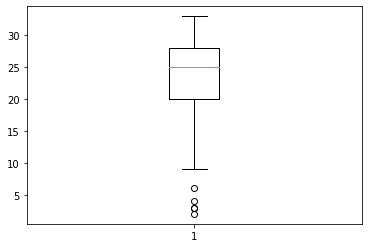

In [114]:
num_row_per_subj = RESTRICTED_DATA.groupby('subject').aggregate('count')['experiment']
plt.boxplot(num_row_per_subj)
plt.plot()

[]

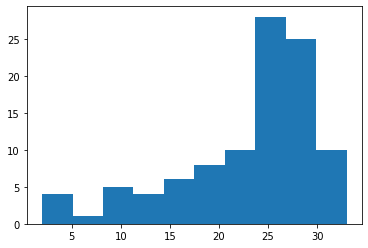

In [115]:
plt.hist(num_row_per_subj)
plt.plot()

In [116]:
num_row_per_subj.mean(), num_row_per_subj.std()

(22.782178217821784, 7.094510498119007)

In [117]:
RESTRICTED_DATA.shape

(2301, 57)

## Some conlcusion about the data
- It seems that the amount of surveys anwswered (experience sampling) has a skewed distribution without some outliers. 
- I do not consider that the difference between subjects is big enough to be a problem. (mean 22.8 surveys answered, with a SD of 7)
- We removed all the features that presented a big proportion of missing cases (> 10% missing rate). This included variables as:
    - Education (encoded differentially in the datasets).
    - Religion (not present in DND)
    - Height and Weight. But every subject has a BMI value.
- The final dataset has a total of 2301 rows and 57 features. The number of features will be different for the modeling phase (variables as Experiment, Date and survey number will be removed)

# Hot encoding and Label encoding

### Convert categorical to numerical
- Ethnicity

- Marital_Status

- Sex

- Period_of_day

### Ordinal
- Household_income

In order to do so we should encode Ordinal variables as a single variable with values [0,1,2,...,n] and we should encode Categorical Variables with one hot encoding. <br>
See this [link](https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b) for an axample.



In [118]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
DF = pd.get_dummies(RESTRICTED_DATA,columns=['Sex','Ethnicity','Marital_Status','Period_of_day']) #dummy encoding for categorical

In [119]:
 DF['Household_income'].unique()

array(['$90,000-$99,999', '$150,000 or more', '$20,000-$29,999',
       '$70,000-$79,999', '$60,000-$69,999', 'Less than $10,000',
       '$30,000-$39,999', '$40,000-$49,999', '$50,000-$59,999',
       '$120,000-$129,999', '$80,000-$89,999', '$10,000-$19,999',
       '$140,000-$149,999', '$150,000 or more ', '$130,000-$139,000',
       '$110,000-$119,999', '$100,000-$109,999', nan], dtype=object)

In [120]:
#Let's order the categories in an ordinal way from 0 to 15
cat = ['Less than $10,000',
       '$10,000-$19,999',
      '$20,000-$29,999',
     '$30,000-$39,999',
     '$40,000-$49,999',
     '$50,000-$59,999',
     '$60,000-$69,999',
     '$70,000-$79,999',
     '$80,000-$89,999',
     '$90,000-$99,999',
     '$100,000-$109,999',
     '$110,000-$119,999',
     '$120,000-$129,999',
     '$130,000-$139,000',
     '$140,000-$149,999',
     '$150,000 or more']
cat_map = {k:v for k,v in zip(cat,range(len(cat)))}

In [121]:
DF['Household_income'] = DF['Household_income'].replace(cat_map)

In [122]:
DF['Household_income'].unique()

array([9, 15, 2, 7, 6, 0, 3, 4, 5, 12, 8, 1, 14, '$150,000 or more ', 13,
       11, 10, nan], dtype=object)

In [123]:
DF['Household_income'] = DF['Household_income'].replace(to_replace= '$150,000 or more ' , value = 15)

In [124]:
DF['Household_income'].unique()

array([ 9., 15.,  2.,  7.,  6.,  0.,  3.,  4.,  5., 12.,  8.,  1., 14.,
       13., 11., 10., nan])

## I do have a doubt about the variable `SUBJECT`. 
## How we should encode this one? In a one hot encoding? Not use it in models that do not take into acount repeated measures?

# Imputing data
I must divide the datasets first (X,y)

Should I input values for different X datasets (train,test)?

[link](https://machinelearningmastery.com/handle-missing-data-python/)

In [125]:
from sklearn.impute import SimpleImputer

# Imputing SWLS
transformed_DF = SimpleImputer().fit_transform(DF.loc[:,['SWLS','SBQ','FTP']])
DF['SWLS'] = transformed_DF[:,0] #we input the value for SWLS. 
#In this case I am not using all the matrix because the function need to transform all the data into float and I have string vars


#transforming to scalar. This is going to be useful when scaling
DF['Minutes Awake'] = DF['Minutes Awake'].astype(float)
DF['Minutes Asleep'] = DF['Minutes Asleep'].astype(float)
DF['Number of Awakenings'] = DF['Number of Awakenings'].astype(float)
DF['Time in Bed'] = DF['Time in Bed'].astype(float)



### Saving the DF clean without HR nor STEPS Time series data.

In [126]:
#with open('../EDA/All_clean_data/DF_R00_DND_WITHOUT_HR_STEPS.pickle', 'wb') as file:
#    pickle.dump(DF,file)

# Adding engineered features

In [127]:
df_features = pd.read_csv('../EDA/All_clean_data/exp_steps_hr_sleep_survey.csv')

In [128]:
# Generate 30 mins prior time point
DF['start_survey_30m_ahead'] =DF['start_survey'] - datetime.timedelta(minutes=30)
DF['start_survey_1h_ahead'] = DF['start_survey'] - datetime.timedelta(minutes=60)
DF['start_survey_3h_ahead'] = DF['start_survey'] - datetime.timedelta(hours=3)

### Steps

In [129]:
# I need to calculate a new field called `date_time` to combine date and time
    #STEPS['date_time'] = STEPS['Date'].astype(str) + ' ' + STEPS['TIME'].astype(str) 
    #STEPS['date_time'] = pd.to_datetime(STEPS['date_time'], errors='coerce')

In [130]:
#with open('../EDA/All_clean_data/STEPS_R00_DND.pickle','wb') as file:
#    pickle.dump(STEPS,file)


In [131]:
with open('../EDA/All_clean_data/STEPS_R00_DND.pickle', 'rb') as file:
    STEPS = pickle.load(file)

### HR

In [132]:
HR['Date'] = pd.to_datetime(HR['Date'], format= '%Y-%m-%d', errors='coerce')

In [133]:
#HR['date_time'] = HR['Date'].astype(str) + ' ' + HR['TIME'].astype(str) 
#HR['date_time'] = pd.to_datetime(HR['date_time'], errors='coerce')

In [134]:
#with open('../EDA/All_clean_data/HR_R00_DND.pickle','wb') as file:
#    pickle.dump(HR,file)

In [135]:
with open('../EDA/All_clean_data/HR_R00_DND.pickle', 'rb') as file:
    HR = pickle.load(file)

### Features

In [136]:
cols = ['subject', 'start_survey',
        'start_survey_5m_ahead', 'start_survey_10m_ahead','step_max', 'step_min', 'step_median', 'steps_max_3h', 'steps_min_3h', 'steps_mean_3h', 'steps_var_3h', 'steps_median_3h', 
        'move_rate_3h', 'active_rate_3h', 'very_active_rate_3h', 'running_rate_3h', 'steps_max_1h', 'steps_min_1h', 'steps_mean_1h', 'steps_var_1h', 'steps_median_1h', 'move_rate_1h', 
        'active_rate_1h', 'very_active_rate_1h', 'running_rate_1h', 'steps_max_30m','steps_min_30m', 'steps_mean_30m', 'steps_var_30m', 'steps_median_30m', 'move_rate_30m', 'active_rate_30m',
        'very_active_rate_30m', 'running_rate_30m', 
        'steps_max_10m', 'steps_min_10m', 'steps_mean_10m', 'steps_var_10m', 'steps_median_10m', 'move_rate_10m', 'active_rate_10m', 'very_active_rate_10m', 'running_rate_10m',
        'steps_max_5m', 'steps_min_5m', 'steps_mean_5m', 'steps_var_5m', 'steps_median_5m', 'move_rate_5m', 'active_rate_5m', 'very_active_rate_5m', 'running_rate_5m','hr_max','hr_min',
        'hr_med','SDNN_3h','pHR2_3h','rMSSD_3h','low_hr_3h','high_hr_3h','l_h_3h','CR_3h','hr_mean_3h','hr_var_3h','hr_std_3h','hr_median_3h','hr_rest_rate_3h','hr_moderate_rate_3h',
        'hr_very_active_rate_3h','SDNN_1h','pHR2_1h','rMSSD_1h','low_hr_1h','high_hr_1h', 'l_h_1h', 'CR_1h', 'hr_mean_1h', 'hr_var_1h', 'hr_std_1h', 'hr_median_1h', 'hr_rest_rate_1h', 
        'hr_moderate_rate_1h', 'hr_very_active_rate_1h', 'SDNN_30m', 'pHR2_30m', 'rMSSD_30m', 'low_hr_30m', 'high_hr_30m', 'l_h_30m', 'CR_30m', 'hr_mean_30m', 'hr_var_30m', 'hr_std_30m',
        'hr_median_30m', 'hr_rest_rate_30m', 'hr_moderate_rate_30m', 'hr_very_active_rate_30m', 'SDNN_10m', 'pHR2_10m', 'rMSSD_10m', 'low_hr_10m', 'high_hr_10m', 'l_h_10m','CR_10m',
        'hr_mean_10m','hr_var_10m','hr_std_10m','hr_median_10m','hr_rest_rate_10m','hr_moderate_rate_10m','hr_very_active_rate_10m','SDNN_5m','pHR2_5m','rMSSD_5m','low_hr_5m','high_hr_5m',
        'l_h_5m','CR_5m','hr_mean_5m','hr_var_5m','hr_std_5m','hr_median_5m','hr_rest_rate_5m','hr_moderate_rate_5m','hr_very_active_rate_5m','hr_0','hr_0.3','hr_0.5','hr_0.8','hr_1']      
        

In [137]:
df_features_small = df_features.loc[:,cols].copy()
df_features_small ['subject'] = df_features_small ['subject'].replace(to_replace = 'DND1', value = 'DND', regex = True,)
df_features_small ['start_survey'] = pd.to_datetime(df_features_small ['start_survey'], errors='coerce')
DF_complete = DF.merge(df_features_small, on = ['subject','start_survey'], how = 'left')

In [138]:
DF_complete.iloc[[99,100]]

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,VALENCE,VALENCE_mean,Date_only_date,HAN_actual,HAN_ideal,HAP_actual,HAP_ideal,HA_actual,HA_ideal,LAN_actual,LAN_ideal,LAP_actual,LAP_ideal,LA_actual,LA_ideal,N_actual,N_ideal,P_actual,P_ideal,Subject,Age,Children,Household_income,BMI,BAS_D,BAS_FS,BAS_RR,BIS.5,BIS_total,NS_total,Conscientiousness_scaled,Extraversion_scaled,Neuroticism_scaled,SWLS,FTP,SBQ,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Sex_Female,Sex_Male,Ethnicity_Asian,Ethnicity_Biracial,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Hispanic/Caucasian,Ethnicity_Hispanic/Other,Ethnicity_More than 1 race,Ethnicity_Native Hawaiian/Pacific Islander,Ethnicity_White,Ethnicity_White/Pacific Islander,Marital_Status_Divorced,Marital_Status_Engaged,Marital_Status_Living with partner,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Period_of_day_Evening,Period_of_day_Morning,Period_of_day_Night,start_survey_30m_ahead,start_survey_1h_ahead,start_survey_3h_ahead,start_survey_5m_ahead,start_survey_10m_ahead,step_max,step_min,step_median,steps_max_3h,steps_min_3h,steps_mean_3h,steps_var_3h,steps_median_3h,move_rate_3h,active_rate_3h,very_active_rate_3h,running_rate_3h,steps_max_1h,steps_min_1h,steps_mean_1h,steps_var_1h,steps_median_1h,move_rate_1h,active_rate_1h,very_active_rate_1h,running_rate_1h,steps_max_30m,steps_min_30m,steps_mean_30m,steps_var_30m,steps_median_30m,move_rate_30m,active_rate_30m,very_active_rate_30m,running_rate_30m,steps_max_10m,steps_min_10m,steps_mean_10m,steps_var_10m,steps_median_10m,move_rate_10m,active_rate_10m,very_active_rate_10m,running_rate_10m,steps_max_5m,steps_min_5m,steps_mean_5m,steps_var_5m,steps_median_5m,move_rate_5m,active_rate_5m,very_active_rate_5m,running_rate_5m,hr_max,hr_min,hr_med,SDNN_3h,pHR2_3h,rMSSD_3h,low_hr_3h,high_hr_3h,l_h_3h,CR_3h,hr_mean_3h,hr_var_3h,hr_std_3h,hr_median_3h,hr_rest_rate_3h,hr_moderate_rate_3h,hr_very_active_rate_3h,SDNN_1h,pHR2_1h,rMSSD_1h,low_hr_1h,high_hr_1h,l_h_1h,CR_1h,hr_mean_1h,hr_var_1h,hr_std_1h,hr_median_1h,hr_rest_rate_1h,hr_moderate_rate_1h,hr_very_active_rate_1h,SDNN_30m,pHR2_30m,rMSSD_30m,low_hr_30m,high_hr_30m,l_h_30m,CR_30m,hr_mean_30m,hr_var_30m,hr_std_30m,hr_median_30m,hr_rest_rate_30m,hr_moderate_rate_30m,hr_very_active_rate_30m,SDNN_10m,pHR2_10m,rMSSD_10m,low_hr_10m,high_hr_10m,l_h_10m,CR_10m,hr_mean_10m,hr_var_10m,hr_std_10m,hr_median_10m,hr_rest_rate_10m,hr_moderate_rate_10m,hr_very_active_rate_10m,SDNN_5m,pHR2_5m,rMSSD_5m,low_hr_5m,high_hr_5m,l_h_5m,CR_5m,hr_mean_5m,hr_var_5m,hr_std_5m,hr_median_5m,hr_rest_rate_5m,hr_moderate_rate_5m,hr_very_active_rate_5m,hr_0,hr_0.3,hr_0.5,hr_0.8,hr_1
99,1079,4.0,4.0,1.0,1.0,2.0,3.0,1.0,2.0,2016-09-03 10:43:07,11,R00,8.0,2.666667,2016-09-03,2.0,1.0,3.8,4.4,3.0,3.0,2.0,1.0,4.2,4.6,2.0,1.4,1.666667,1.0,3.666667,4.333333,1079,59.0,1.0,2.0,25.351541,19.0,14.0,25.0,25.0,54.0,11.0,0.979167,0.666667,0.083333,17.0,6.9,51.0,2016-09-03,228.0,10.0,1.0,238.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2016-09-03 10:13:07,2016-09-03 09:43:07,2016-09-03 07:43:07,2016-09-03 10:38:07,2016-09-03 10:33:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,1079,4.0,4.0,1.0,1.0,4.0,3.0,1.0,1.0,2016-09-03 15:02:31,12,R00,8.0,2.666667,2016-09-03,2.0,1.0,3.8,4.4,3.0,3.0,2.0,1.0,4.2,4.6,2.0,1.4,1.666667,1.0,3.666667,4.333333,1079,59.0,1.0,2.0,25.351541,19.0,14.0,25.0,25.0,54.0,11.0,0.979167,0.666667,0.083333,17.0,6.9,51.0,2016-09-03,228.0,10.0,1.0,238.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2016-09-03 14:32:31,2

### We have missing case where subjects have steps data or HR bot no both. 
#### I am going to delete the cases with missing values.

In [139]:
DF_complete.shape

(2301, 205)

In [140]:
DF_complete_nona = DF_complete.dropna()

In [141]:
DF_complete_nona.shape

(2017, 205)

In [142]:
#SAVING DF
with open('./DF_comple_no_NAN.pickle', 'wb') as file:
    pickle.dump(DF_complete_nona, file)

---

## Fourier Transform
#### I need to research more about this given that the sampling rate in this case is weird (sometime 1 every 15 scs, sometimes 1 every 5).

In [82]:
from scipy import signal
def fourier(df,subject,start_survey, time):
    '''
    df : HR or STEPS
    '''
    delta_time = start_survey - datetime.timedelta(hours = time)
    filtered = df.loc[(df['ID'] == subject) & ((df['date_time'] >= delta_time) &  (df['date_time'] <= start_survey))]
    f, ps =  signal.welch (filtered['VALUE'], 1/10, scaling='spectrum') #assuming a SR of 1 smaplig every 10 sec.

    return filtered

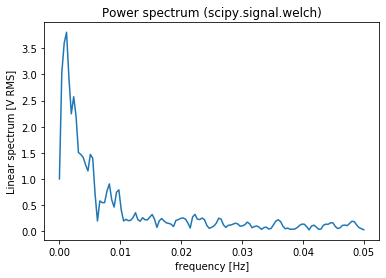

In [52]:
small = fourier(HR, DF_complete_nona['subject'][5] , DF_complete_nona['start_survey'][5], 1)
f,ps = signal.welch (small['VALUE'], 1/10, scaling='spectrum') #assuming a SR of 1 smaplig every 10 sec.

plt.figure()
plt.plot(f,np.sqrt(ps))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
plt.show()

#Possible things to do:
#    - Take the average power in window of [ b > freq > a ]


# Split by subject Train / Test 

---
_We can make the assumption that every row is independent. This is not accurate, but we should research about how to deal with this._

_Ask kyle about how to deal with the repeated measures. <br>_
_There is a problem In the case we include subject as a feature in a ML model, we are not going to be able to predict unknown subjects. Unless we hot encode...but:_

> One hot encoding cluster is an option, but this has known bad performance as explained in this excellent blog post (and as we’ll show below). Long story short, directly using high cardinality categorical variables as features in a model sucks.

Maybe a Mixed Effect Random Forest could be useful. **[Link](https://towardsdatascience.com/mixed-effects-random-forests-6ecbb85cb177)**

Once fit the MERF can be used to predict for data in the **“Known”** clusters, that the MERF saw in training, the prediction includes the random effect correction.
This approach should be better for Known subjects that a common RF approach. Nevertheless, the accuracy for **Unknow** subjects will depend on the complexity of the data.

---

## I am going to make two different datasets just to start coding a model. 

One is going to be a X,y (I will use this one in a nested CV in the future) and other one would be [X_train, y_train, X_test, y_test] where the test dataset will be composed by:
- Unknown (new)  subjects (clusters) that the model had no knowledge of at training time (I will include the subjects with the least amount of repeated measures) 
- Known  subjects (clusters) that the model trained on

I am making the assumption that subjects with lower repeated measures are independent and that there is no latent variable that is correlated with them.

In [144]:
DF_complete_nona.head()

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,VALENCE,VALENCE_mean,Date_only_date,HAN_actual,HAN_ideal,HAP_actual,HAP_ideal,HA_actual,HA_ideal,LAN_actual,LAN_ideal,LAP_actual,LAP_ideal,LA_actual,LA_ideal,N_actual,N_ideal,P_actual,P_ideal,Subject,Age,Children,Household_income,BMI,BAS_D,BAS_FS,BAS_RR,BIS.5,BIS_total,NS_total,Conscientiousness_scaled,Extraversion_scaled,Neuroticism_scaled,SWLS,FTP,SBQ,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Sex_Female,Sex_Male,Ethnicity_Asian,Ethnicity_Biracial,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Hispanic/Caucasian,Ethnicity_Hispanic/Other,Ethnicity_More than 1 race,Ethnicity_Native Hawaiian/Pacific Islander,Ethnicity_White,Ethnicity_White/Pacific Islander,Marital_Status_Divorced,Marital_Status_Engaged,Marital_Status_Living with partner,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Period_of_day_Evening,Period_of_day_Morning,Period_of_day_Night,start_survey_30m_ahead,start_survey_1h_ahead,start_survey_3h_ahead,start_survey_5m_ahead,start_survey_10m_ahead,step_max,step_min,step_median,steps_max_3h,steps_min_3h,steps_mean_3h,steps_var_3h,steps_median_3h,move_rate_3h,active_rate_3h,very_active_rate_3h,running_rate_3h,steps_max_1h,steps_min_1h,steps_mean_1h,steps_var_1h,steps_median_1h,move_rate_1h,active_rate_1h,very_active_rate_1h,running_rate_1h,steps_max_30m,steps_min_30m,steps_mean_30m,steps_var_30m,steps_median_30m,move_rate_30m,active_rate_30m,very_active_rate_30m,running_rate_30m,steps_max_10m,steps_min_10m,steps_mean_10m,steps_var_10m,steps_median_10m,move_rate_10m,active_rate_10m,very_active_rate_10m,running_rate_10m,steps_max_5m,steps_min_5m,steps_mean_5m,steps_var_5m,steps_median_5m,move_rate_5m,active_rate_5m,very_active_rate_5m,running_rate_5m,hr_max,hr_min,hr_med,SDNN_3h,pHR2_3h,rMSSD_3h,low_hr_3h,high_hr_3h,l_h_3h,CR_3h,hr_mean_3h,hr_var_3h,hr_std_3h,hr_median_3h,hr_rest_rate_3h,hr_moderate_rate_3h,hr_very_active_rate_3h,SDNN_1h,pHR2_1h,rMSSD_1h,low_hr_1h,high_hr_1h,l_h_1h,CR_1h,hr_mean_1h,hr_var_1h,hr_std_1h,hr_median_1h,hr_rest_rate_1h,hr_moderate_rate_1h,hr_very_active_rate_1h,SDNN_30m,pHR2_30m,rMSSD_30m,low_hr_30m,high_hr_30m,l_h_30m,CR_30m,hr_mean_30m,hr_var_30m,hr_std_30m,hr_median_30m,hr_rest_rate_30m,hr_moderate_rate_30m,hr_very_active_rate_30m,SDNN_10m,pHR2_10m,rMSSD_10m,low_hr_10m,high_hr_10m,l_h_10m,CR_10m,hr_mean_10m,hr_var_10m,hr_std_10m,hr_median_10m,hr_rest_rate_10m,hr_moderate_rate_10m,hr_very_active_rate_10m,SDNN_5m,pHR2_5m,rMSSD_5m,low_hr_5m,high_hr_5m,l_h_5m,CR_5m,hr_mean_5m,hr_var_5m,hr_std_5m,hr_median_5m,hr_rest_rate_5m,hr_moderate_rate_5m,hr_very_active_rate_5m,hr_0,hr_0.3,hr_0.5,hr_0.8,hr_1
2,1047,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-20 21:13:34,4,R00,8.0,2.666667,2016-02-20,1.333333,1.0,2.6,2.8,2.0,2.333333,1.666667,1.0,3.6,4.2,2.0,1.8,1.0,1.0,4.333333,4.333333,1047,43.0,3.0,9.0,27.328927,14.0,16.0,23.0,24.0,51.0,11.0,0.875,0.583333,0.208333,25.0,5.5,60.0,2016-02-20,147.0,10.0,6.0,157.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2016-02-20 20:43:34,2016-02-20 20:13:34,2016-02-20 18:13:34,2016-02-20 21:08:34,2016-02-20 21:03:34,110.0,0.0,0.0,110.0,0.0,4.311111,209.813284,0.0,0.155556,0.100000,0.066667,0.044444,76.0,0.0,2.216667,133.325141,0.0,0.050000,0.033333,0.033333,0.033333,76.0,0.0,4.133333,260.947126,0.0,0.066667,0.066667,0.066667,0.066667,76.0,0.0,12.4,726.933333,0.0,0.2,0.2,0.2,0.2,76.0,0.0,24.8,1251.2,0.0,0.4,0.4,0.4,0.4,127.0,63.0,85.0,0.001523,0.151828,2.057286,63.0,114.0,0.552632,0.897638,79.605805,107.223097,10.354859,77.0,0.555243,0.179775,0.081461,0.000918,0.123077,1.950937,64.0,99.0,0.646465,0.779528,76.411043,31.498216,5.612327,76.0,0.690184,0.070552,0.000000,0.000943,0.140244,1.844570,69.0,99.0,0.696970,0.779528,78.654545,37.800665,6.148225,77.0,0.539394,0.121212,0.000000,0.001125,0.186441,1.978700,71.0,99.0,0.717172,0.779528,81.916667,61.806497,7.861711,80.0,0.316667,0.233333,0.000000,0.001094,0.125000,1.968502,76.0,99.0,0.767677,0.779528,85.757576,68.18939

In [145]:
#Solving a problem. DND has a different scale for AVI
cols_5 = ['HAP_actual', 'LAP_actual', 'LA_actual', 'HAP_ideal', 'LAP_ideal', 'LA_ideal']
cols_3 = ['HAN_actual', 'HAN_ideal', 'HA_actual', 'HA_ideal', 'LAN_actual', 'LAN_ideal', 'N_actual', 'N_ideal', 'P_actual', 'P_ideal']
for i in cols_5:
    DF_complete_nona.loc[DF_complete_nona.experiment == 'DND',i] = DF_complete_nona.loc[DF_complete_nona.experiment == 'DND',i].apply(lambda x: x/5)
for i in cols_3:
    DF_complete_nona.loc[DF_complete_nona.experiment == 'DND',i] = DF_complete_nona.loc[DF_complete_nona.experiment == 'DND',i].apply(lambda x: x/3)

C:\Users\joaqu\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [147]:
DF_complete_nona

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,VALENCE,VALENCE_mean,Date_only_date,HAN_actual,HAN_ideal,HAP_actual,HAP_ideal,HA_actual,HA_ideal,LAN_actual,LAN_ideal,LAP_actual,LAP_ideal,LA_actual,LA_ideal,N_actual,N_ideal,P_actual,P_ideal,Subject,Age,Children,Household_income,BMI,BAS_D,BAS_FS,BAS_RR,BIS.5,BIS_total,NS_total,Conscientiousness_scaled,Extraversion_scaled,Neuroticism_scaled,SWLS,FTP,SBQ,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Sex_Female,Sex_Male,Ethnicity_Asian,Ethnicity_Biracial,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Hispanic/Caucasian,Ethnicity_Hispanic/Other,Ethnicity_More than 1 race,Ethnicity_Native Hawaiian/Pacific Islander,Ethnicity_White,Ethnicity_White/Pacific Islander,Marital_Status_Divorced,Marital_Status_Engaged,Marital_Status_Living with partner,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Period_of_day_Evening,Period_of_day_Morning,Period_of_day_Night,start_survey_30m_ahead,start_survey_1h_ahead,start_survey_3h_ahead,start_survey_5m_ahead,start_survey_10m_ahead,step_max,step_min,step_median,steps_max_3h,steps_min_3h,steps_mean_3h,steps_var_3h,steps_median_3h,move_rate_3h,active_rate_3h,very_active_rate_3h,running_rate_3h,steps_max_1h,steps_min_1h,steps_mean_1h,steps_var_1h,steps_median_1h,move_rate_1h,active_rate_1h,very_active_rate_1h,running_rate_1h,steps_max_30m,steps_min_30m,steps_mean_30m,steps_var_30m,steps_median_30m,move_rate_30m,active_rate_30m,very_active_rate_30m,running_rate_30m,steps_max_10m,steps_min_10m,steps_mean_10m,steps_var_10m,steps_median_10m,move_rate_10m,active_rate_10m,very_active_rate_10m,running_rate_10m,steps_max_5m,steps_min_5m,steps_mean_5m,steps_var_5m,steps_median_5m,move_rate_5m,active_rate_5m,very_active_rate_5m,running_rate_5m,hr_max,hr_min,hr_med,SDNN_3h,pHR2_3h,rMSSD_3h,low_hr_3h,high_hr_3h,l_h_3h,CR_3h,hr_mean_3h,hr_var_3h,hr_std_3h,hr_median_3h,hr_rest_rate_3h,hr_moderate_rate_3h,hr_very_active_rate_3h,SDNN_1h,pHR2_1h,rMSSD_1h,low_hr_1h,high_hr_1h,l_h_1h,CR_1h,hr_mean_1h,hr_var_1h,hr_std_1h,hr_median_1h,hr_rest_rate_1h,hr_moderate_rate_1h,hr_very_active_rate_1h,SDNN_30m,pHR2_30m,rMSSD_30m,low_hr_30m,high_hr_30m,l_h_30m,CR_30m,hr_mean_30m,hr_var_30m,hr_std_30m,hr_median_30m,hr_rest_rate_30m,hr_moderate_rate_30m,hr_very_active_rate_30m,SDNN_10m,pHR2_10m,rMSSD_10m,low_hr_10m,high_hr_10m,l_h_10m,CR_10m,hr_mean_10m,hr_var_10m,hr_std_10m,hr_median_10m,hr_rest_rate_10m,hr_moderate_rate_10m,hr_very_active_rate_10m,SDNN_5m,pHR2_5m,rMSSD_5m,low_hr_5m,high_hr_5m,l_h_5m,CR_5m,hr_mean_5m,hr_var_5m,hr_std_5m,hr_median_5m,hr_rest_rate_5m,hr_moderate_rate_5m,hr_very_active_rate_5m,hr_0,hr_0.3,hr_0.5,hr_0.8,hr_1
2,1047,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-20 21:13:34,4,R00,8.0,2.666667,2016-02-20,1.333333,1.0,2.6,2.8,2.000000,2.333333,1.666667,1.000000,3.6,4.2,2.0,1.8,1.0,1.000000,4.333333,4.333333,1047,43.0,3.0,9.0,27.328927,14.0,16.0,23.0,24.0,51.0,11.0,0.875,0.583333,0.208333,25.0,5.5,60.0,2016-02-20,147.0,10.0,6.0,157.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2016-02-20 20:43:34,2016-02-20 20:13:34,2016-02-20 18:13:34,2016-02-20 21:08:34,2016-02-20 21:03:34,110.0,0.0,0.0,110.0,0.0,4.311111,209.813284,0.0,0.155556,0.100000,0.066667,0.044444,76.0,0.0,2.216667,133.325141,0.0,0.050000,0.033333,0.033333,0.033333,76.0,0.0,4.133333,260.947126,0.0,0.066667,0.066667,0.066667,0.066667,76.0,0.0,12.4,726.933333,0.0,0.2,0.2,0.2,0.2,76.0,0.0,24.8,1251.2,0.0,0.4,0.4,0.4,0.4,127.0,63.0,85.0,0.001523,0.151828,2.057286,63.0,114.0,0.552632,0.897638,79.605805,107.223097,10.354859,77.0,0.555243,0.179775,0.081461,0.000918,0.123077,1.950937,64.0,99.0,0.646465,0.779528,76.411043,31.498216,5.612327,76.0,0.690184,0.070552,0.000000,0.000943,0.140244,1.844570,69.0,99.0,0.696970,0.779528,78.654545,37.800665,6.148225,77.0,0.539394,0.121212,0.000000,0.001125,0.186441,1.978700,71.0,99.0,0.717172,0.779528,81.916667,61.806497,7.861711,80.0,0.316667,0.233333,0.000000,0.001094,0.125000,1.968502,76.0,99.0,0.767677,0.779528,85.

In [148]:
#Dividing the dataset
#Columns to drop (the normal RF is not goign to include 'subject')
cols_drop = ['la_p',	'ha_p',	'ha_n',	'la_n',	'la',	'p',	'n',	'ha',
              'start_survey','survey_no','experiment', 'VALENCE', 'Date_only_date', 'Subject', 'Date', 
             'start_survey_30m_ahead', 'start_survey_1h_ahead',	'start_survey_3h_ahead', 'start_survey_5m_ahead', 'start_survey_10m_ahead']

In [149]:
list_of_repeated = DF_complete_nona.groupby('subject').aggregate('count')['experiment'].sort_values(ascending = True)

In [150]:
print(f'I need {round(20 * DF_complete_nona.shape[0] / 100)} subjects for the test set')

I need 403 subjects for the test set


200 unknown and 200 known

In [151]:
list_of_repeated[:21].sum()

194

In [152]:
list_of_repeated[:21].index

Index(['1051', 'DND083', '1030', '1087', 'DND091', 'DND030', 'DND115', '1029',
       '1041', 'DND007', '1018', 'DND013', '1037', '1032', '1045', '1014',
       'DND046', '1060', 'DND006', 'DND070', 'DND100'],
      dtype='object', name='subject')

In [153]:
X_unknown_test = DF_complete_nona.loc[DF_complete_nona['subject'].isin(list_of_repeated[:21].index)].copy()
X_unknown_test = X_unknown_test.drop(columns = cols_drop)

In [154]:
from sklearn.model_selection import train_test_split
# Using the subjects that are NOT in the unknow dataset
X_train, X_known_test = train_test_split(DF_complete_nona.loc[~DF_complete_nona['subject'].isin(list_of_repeated[:21].index)], test_size = .11, random_state = 7)
#The random state is to be sure that I am using the same test set for MERF

In [155]:
X_train = X_train.drop(columns = cols_drop)
X_known_test = X_known_test.drop(columns= cols_drop)

In [156]:
# I will store original dataset with the `_subj` ending to store the DF that I will use in the MERF model 
X_train_subj = X_train.copy()
X_known_test_subj = X_known_test.copy()
X_unknown_test_subj = X_unknown_test.copy()
X_unified_test_subj = pd.concat([X_known_test_subj,X_unknown_test_subj])

Now I have my datasets, lets generate the `y` datasets. 
There would  be 3 dataset: 
- y_train
- y_test_unknow
- y_test_know
- y_test_unified

In [157]:
y_train = X_train['VALENCE_mean'].copy()
y_test_unknow = X_unknown_test['VALENCE_mean'].copy()
y_test_know = X_known_test['VALENCE_mean'].copy()
X_unified_test = pd.concat([X_known_test,X_unknown_test])
y_test_unified = X_unified_test['VALENCE_mean'].copy()

In [158]:
# Remove Valence from all the train data
for df in [X_known_test,X_train,X_unified_test, X_unknown_test]:
    df.drop(columns = 'VALENCE_mean',inplace = True)

## Plot histogram of the `Unknown subjects` vs `Known subjects`

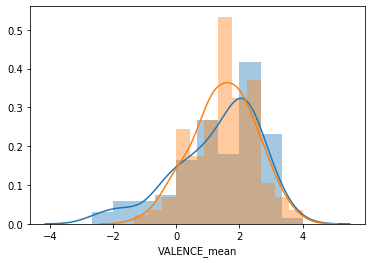

In [159]:
import seaborn as sns
sns.distplot(y_test_know)
sns.distplot(y_test_unknow)

#### They look very similar. 
We do not have evidence to say that the distribution is different between groups. We are going to proceed with this dataset.

# Scaling data

#### We should remove the subject label for the Lasso and RF models

In [160]:
from sklearn import preprocessing
#drop subject
X_train = X_train.drop(columns = 'subject')
X_unified_test = X_unified_test.drop(columns='subject')
X_unknown_test = X_unknown_test.drop(columns='subject')
X_known_test = X_known_test.drop(columns='subject')
#Use the train dataset to fit my scaler
SCALER = preprocessing.StandardScaler().fit(X_train)

In [161]:
#Cols name (useuful for lasso regression and feature importance)
cols_coef = X_unified_test.columns

In [162]:
#apply scaler to the DF 
X_train_scaled = SCALER.transform(X_train)
X_unified_test_scaled = SCALER.transform(X_unified_test )
X_unknown_test_scaled = SCALER.transform(X_unknown_test)
X_known_test_scaled = SCALER.transform(X_known_test)

---
# Modeling

# Simple Linear Regression

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearRegression()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring ='neg_mean_squared_error')
print(f'Mean [Mean Square Error] : {result.mean()}, [Mean Square Error] STD : {result.std()}')

Mean [Mean Square Error] : -3.2391907449684904e+23, [Mean Square Error] STD : 4.580907482647849e+23


It does not seem that a linear regression is going to be useful to predict the valence. Terrible Mean Square Error during the CV.

In [164]:
def evaluate(model,
             test_set_name = ['Unknown','Known', 'Unified'],
             x_test = [X_unknown_test_scaled, X_known_test_scaled, X_unified_test_scaled] ,
             y_test = [y_test_unknow, y_test_know, y_test_unified] ):
    '''
    Evaluate MAE, MSE,  RMSE of a model for all the test sets
    '''
    #initialize columns
    df = pd.DataFrame(columns = ['Test set', 'MAE', 'MSE', 'RMSE'])
    
    for ts , x , y in zip(test_set_name, x_test, y_test):
        predicted = model.predict(x)
        rmse  = np.sqrt(mean_squared_error(y, predicted))
        mae =  mean_absolute_error(y,predicted)
        mse = mean_squared_error(y, predicted)
        df = df.append({'Test set' : ts,
                        'MAE' : mae,
                        'MSE' : mse,
                        'RMSE' : rmse}, ignore_index= True )
    return df

In [167]:
#Fit the model and check the values
linear_reg = model.fit(X_train_scaled,y_train)
evaluate(linear_reg)

,Test set,MAE,MSE,RMSE
0,Unknown,8.167547e+11,1.437946e+25,3.792026e+12
1,Known,9.733381e-01,1.608314e+00,1.268193e+00
2,Unified,4.011403e+11,7.062316e+24,2.657502e+12


## Insights of Simple Linear Regression
If we only analize the predictions for the Unified dataset we can observe the following:

- The simple linear regression is a very bad model.

- It seems that the model is not able to correctly predict `Unknow` data. This could be because there are a lot of values that are repeated among subjects (all the demographic and personality data) and they are novel for new subjects. 

- The model is constantly over predicting (that why we have positive residuals)

# Lasso

In [166]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [168]:
#set lasso as the moedl
model = Lasso(random_state=0, max_iter=10000)
kfold = KFold(n_splits=5, random_state=7)

#Params for GridSearch 
alphas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
param_grid = [{'alpha': alphas}]
clf = GridSearchCV(model, param_grid, cv=kfold, refit=False, scoring= 'neg_mean_squared_error')
clf.fit(X_train_scaled, y_train)

C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3518194696712271, tolerance: 0.18741089694166024
  positive)


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1,
                                    0.2]}],
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [169]:
clf.best_params_

{'alpha': 0.01}

Text(0, 0.5, 'Negative Mean Square Error [Average]')

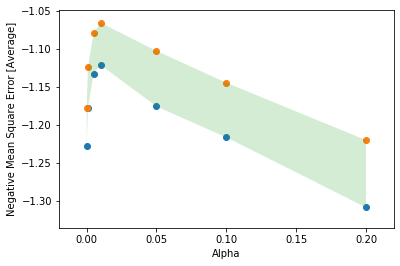

In [170]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
std_error = scores_std / np.sqrt(5)
plt.scatter(alphas, scores - std_error)
plt.scatter(alphas, scores + std_error)
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Square Error [Average]')

In [172]:
#Fitting the Lasso regression with the best alpha value
lasso_fit = Lasso(alpha= 0.01).fit(X_train_scaled, y_train)

#### Lasso offers a useful feature selection given the importance of the coefficients.

In [173]:
print(f'{(lasso_fit.coef_ > 0).sum()} coefficients are > than 0. The original number of variables were {len(lasso_fit.coef_)}')

35 coefficients are > than 0. The original number of variables were 183


In [174]:
#Let's make a table with the different coefficients and residuals
lasso_coef_df = pd.DataFrame(data = {'Feature' : cols_coef[lasso_fit.coef_ > 0],
                                     'Coefficients' : lasso_fit.coef_[lasso_fit.coef_ > 0]})
lasso_coef_df = lasso_coef_df.sort_values(by= 'Coefficients', ascending = False)
lasso_coef_df

,Feature,Coefficients
27,hr_min,0.226690
4,LAP_actual,0.204600
0,HAP_actual,0.135467
1,HA_actual,0.120387
5,LA_actual,0.106568
9,BIS.5,0.083840
2,HA_ideal,0.073872
8,BAS_FS,0.069436
7,Household_income,0.066268
31,hr_rest_rate_1h,0.042158


In [175]:
evaluate(lasso_fit)

,Test set,MAE,MSE,RMSE
0,Unknown,0.992435,1.545168,1.243048
1,Known,0.858198,1.254919,1.120232
2,Unified,0.924127,1.397471,1.182147


### Insights of Lasso regression
We can observe that Lasso regression is orders of magnitude more accurate than a the simple linear regression. 

We should compare the performance against other models. We are going to explore different non-linear models.

# Random Forest `without` Subject as a feature

In [176]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [177]:
#set the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=7, n_jobs = -1) #this could take time

In [178]:
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 40.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [195]:
#with open ('./rf.pickle','wb') as file:
#    pickle.dump(rf_random,file)

In [179]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [180]:
# Check how good is the RF to predict the Unified test set with the best params for the Random Search
np.sqrt(mean_squared_error(rf_random.best_estimator_.predict(X_unified_test_scaled), y_test_unified))

1.0021337717060685

### CV Grid Search

In [181]:
param_grid = {'n_estimators': [1500,1600,1700],
             'min_samples_split': [4,5,6],
             'min_samples_leaf': [3,4,5],
             'max_features': ['sqrt'],
             'max_depth': [100, 110, 120 ,130,140],
             'bootstrap': [False]}

In [182]:
#Use k-fold 
kfold = KFold(n_splits=5, random_state=7)
#Apply Grid Search to fine tune the parameters
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = kfold, n_jobs = -1, verbose = 2, scoring= 'neg_mean_squared_error')

In [183]:
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed: 31.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn'...
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
         

In [189]:
#Check for best estim
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=140,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [190]:
#Let's assign the best estimator to my model
rf_optimized = grid_search.best_estimator_
print(rf_optimized)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=140,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [185]:
#with open ('./rf_optimized.pickle','rb') as file:
#      model_rf = pickle.load(file)

In [191]:
evaluate(rf_optimized)

,Test set,MAE,MSE,RMSE
0,Unknown,0.778032,0.930356,0.964550
1,Known,0.795444,1.083959,1.041134
2,Unified,0.786892,1.008519,1.004250


### Feature importance for RF

In [192]:
# Feature importance for RF
features_df = pd.DataFrame(data = {'Feature' : cols_coef,
                                   'Importance' : rf_optimized.feature_importances_})
features_df = features_df.sort_values(by= 'Importance', ascending = False)
features_df.head(10)

,Feature,Importance
8,LAP_actual,0.036694
28,Neuroticism_scaled,0.032171
2,HAP_actual,0.022911
14,P_actual,0.020183
16,Age,0.017804
6,LAN_actual,0.017248
27,Extraversion_scaled,0.017181
182,hr_1,0.013784
105,hr_max,0.012846
19,BMI,0.012665


### Insights of RF
RF shas better scores than Lasso. 

Also, it has a complete list of feature importance. This could be even more useful than only using 38 coeficients

#  Mixed Effect Random Forest (MERF)

##### Install the MERF package
conda install -c leylabmpi merf


In [254]:
#The anaconda promt trwed a weird message. Installing merf via pip instead.
!pip install merf

In [193]:
from merf.merf import MERF

#### I need to use the `subject` feature to train this model


In [194]:
# Remove Valence from all the train data
for df in [X_known_test_subj, X_train_subj, X_unified_test_subj, X_unknown_test_subj]:
    df.drop(columns = 'VALENCE_mean',inplace = True)

#X_train_subj 
#X_known_test_subj 
#X_unknown_test_subj 

#### Preparing all the parameters for MERF. 

In [195]:
## Z is and all ones parameter. Because we have only one randome effect in this case : `subject`

# Z
X_train_subj['Z'] = 1 
Z_train = X_train_subj[['Z']] #they use  `DataFrame` instead of `Series` format. At least for Z.
# Train - data
X_train_subj.drop(columns = 'Z', inplace = True)
X_train_vector = X_train_subj.drop(columns = 'subject')
#Clusters - Subject
clusters_train = X_train_subj['subject']
# y - labels
y_train_vector = y_train.copy()

####  Creating test datasets `with` subject

In [196]:
# Data is not scaled. Should check if this matters, i don not think that it matters for RF models.
## [https://stackoverflow.com/questions/8961586/do-i-need-to-normalize-or-scale-data-for-randomforest-r-package]

#Known values
X_known = X_known_test_subj.drop(columns = 'subject')
Z_known = pd.DataFrame(data = np.repeat(1,X_known.shape[0])) #it's always a column of ones in a `Dataframe` format
clusters_known = X_known_test_subj['subject']
y_known = y_test_know

# Unknown values (new)
X_new = X_unknown_test_subj.drop(columns = 'subject')
Z_new = pd.DataFrame(data = np.repeat(1,X_new.shape[0]))
clusters_new = X_unknown_test_subj['subject']
y_new = y_test_unknow

# Unified values
X_unified = X_unified_test_subj.drop(columns = 'subject')
Z_unified = pd.DataFrame(data = np.repeat(1,X_unified.shape[0]))
clusters_unified = X_unified_test_subj['subject']
y_unified  = y_test_unified


In [197]:
# A mapper to recode the subjects into integers
mapper = {k:v for k,v in zip(DF_complete_nona.subject.unique(),range(len(DF_complete_nona.subject.unique()))) }
clusters_train = clusters_train.replace(mapper)
clusters_known = clusters_known.replace(mapper)
clusters_new = clusters_new.replace(mapper)
clusters_unified = clusters_unified.replace(mapper)

###  Train MERF model

In [198]:
mrf = MERF(n_estimators=300, max_iterations=100)
mrf.fit(X_train_vector, Z_train, clusters_train, y_train_vector)

INFO     [merf.py:250] GLL is 1361.6089703623347 at iteration 1.
INFO     [merf.py:250] GLL is 1368.097541647414 at iteration 2.
INFO     [merf.py:250] GLL is 1355.4717772926763 at iteration 3.
INFO     [merf.py:250] GLL is 1340.1875827699398 at iteration 4.
INFO     [merf.py:250] GLL is 1338.0426747085826 at iteration 5.
INFO     [merf.py:250] GLL is 1325.757372191239 at iteration 6.
INFO     [merf.py:250] GLL is 1321.9960370016404 at iteration 7.
INFO     [merf.py:250] GLL is 1307.0620392866417 at iteration 8.
INFO     [merf.py:250] GLL is 1280.4392652358201 at iteration 9.
INFO     [merf.py:250] GLL is 1275.6561666236532 at iteration 10.
INFO     [merf.py:250] GLL is 1256.6298965710992 at iteration 11.
INFO     [merf.py:250] GLL is 1236.4585177289077 at iteration 12.
INFO     [merf.py:250] GLL is 1239.9758201704897 at iteration 13.
INFO     [merf.py:250] GLL is 1231.9704651175562 at iteration 14.
INFO     [merf.py:250] GLL is 1219.4381613627618 at iteration 15.
INFO     [merf.py:250

In [199]:
# Saving the model
with open('./mrf.pickle','wb') as file:
    pickle.dump(mrf,file)

In [200]:
#Function to evaluate different metrics for the model MERF
def evaluate_MERF(model,
             test_set_name = ['Unknown','Known', 'Unified' ],
             x_test = [X_new, X_known, X_unified],
             y_test = [y_new, y_known, y_unified],
             Z = [Z_known],
             clusters = [clusters_new, clusters_known, clusters_unified]):
    '''
    Evaluate MAE, MSE,  RMSE of a model for all the test sets
    '''
    #initialize columns
    df = pd.DataFrame(columns = ['Test set', 'MAE', 'MSE', 'RMSE'])
    
    for ts , x , y, z, cluster in zip(test_set_name, x_test, y_test, Z, clusters):
        predicted = model.predict(x, z, cluster)
        rmse  = np.sqrt(mean_squared_error(y, predicted))
        mae =  mean_absolute_error(y,predicted)
        mse = mean_squared_error(y, predicted)
        df = df.append({'Test set' : ts,
                        'MAE' : mae,
                        'MSE' : mse,
                        'RMSE' : rmse}, ignore_index= True )
    return df

In [201]:
evaluate_MERF(mrf, 
              test_set_name = ['Unknown','Known', 'Unified'],
              x_test = [X_new, X_known, X_unified],
              y_test = [y_new, y_known, y_unified],
              Z = [Z_new, Z_known, Z_unified],
              clusters = [clusters_new, clusters_known, clusters_unified]              
             )

,Test set,MAE,MSE,RMSE
0,Unknown,0.806480,1.045034,1.022269
1,Known,0.807230,1.109694,1.053420
2,Unified,0.806862,1.077937,1.038237


In [220]:
#Changed the number of estimators (CV is costly, should prepare a script and run it in Colab)

mrf_recode = MERF(n_estimators=1500, max_iterations=100)
mrf_recode.fit(X_train_vector, Z_train, clusters_train, y_train_vector)

INFO     [merf.py:250] GLL is 1352.4844102148115 at iteration 1.
INFO     [merf.py:250] GLL is 1346.9491315384612 at iteration 2.
INFO     [merf.py:250] GLL is 1342.6623963839018 at iteration 3.
INFO     [merf.py:250] GLL is 1332.6117662420447 at iteration 4.
INFO     [merf.py:250] GLL is 1326.4270026941886 at iteration 5.
INFO     [merf.py:250] GLL is 1307.7090352158298 at iteration 6.
INFO     [merf.py:250] GLL is 1292.528100006028 at iteration 7.
INFO     [merf.py:250] GLL is 1280.259551998944 at iteration 8.
INFO     [merf.py:250] GLL is 1273.4706123528708 at iteration 9.
INFO     [merf.py:250] GLL is 1265.6656059972386 at iteration 10.
INFO     [merf.py:250] GLL is 1251.0841686827657 at iteration 11.
INFO     [merf.py:250] GLL is 1232.0824647281077 at iteration 12.
INFO     [merf.py:250] GLL is 1227.8803857119472 at iteration 13.
INFO     [merf.py:250] GLL is 1219.4579114722644 at iteration 14.
INFO     [merf.py:250] GLL is 1209.2942108658413 at iteration 15.
INFO     [merf.py:250

In [221]:
# Saving the model
with open('./mrf_recode.pickle','wb') as file:
    pickle.dump(mrf_recode,file)

In [230]:
evaluate_MERF(mrf_recode,
              test_set_name = ['Unknown','Known', 'Unified'],
              x_test = [X_new, X_known, X_unified],
              y_test = [y_new, y_known, y_unified],
              Z = [Z_new, Z_known, Z_unified],
              clusters = [clusters_new, clusters_known, clusters_unified]              
             )

,Test set,MAE,MSE,RMSE
0,Unknown,0.816421,1.072586,1.035657
1,Known,0.801740,1.091521,1.044759
2,Unified,0.808950,1.082221,1.040299


# Conclusions

In [233]:
evaluate(lasso_fit)

,Test set,MAE,MSE,RMSE
0,Unknown,0.992435,1.545168,1.243048
1,Known,0.858198,1.254919,1.120232
2,Unified,0.924127,1.397471,1.182147


In [234]:
evaluate(rf_optimized)

,Test set,MAE,MSE,RMSE
0,Unknown,0.778032,0.930356,0.964550
1,Known,0.795444,1.083959,1.041134
2,Unified,0.786892,1.008519,1.004250


In [225]:
evaluate_MERF(mrf, 
              test_set_name = ['Unknown','Known', 'Unified'],
              x_test = [X_new, X_known, X_unified],
              y_test = [y_new, y_known, y_unified],
              Z = [Z_new, Z_known, Z_unified],
              clusters = [clusters_new, clusters_known, clusters_unified]              
             )

,Test set,MAE,MSE,RMSE
0,Unknown,0.806480,1.045034,1.022269
1,Known,0.807230,1.109694,1.053420
2,Unified,0.806862,1.077937,1.038237


# Conclusions (so far)

- MERF is better than RF to predict known subjects. This result is coherent with how MERF works  and with the assumption that subjects behave in a cluster-like way.
- Depending on the need of our client we should choose one model over the other. If we want to predict knew subjects a RF will be better, if we want to predict the emotion for known subjects then MERF is a possible option.

# Possible Next steps:

- Make a K-fold CV to compare RF and MERF before testing (Now is late for that, but would be good idea in the future).
- Run a GridsearchCV tunning some hyperparameters (this is going to be costly, shoul run it in a CoLab notebook).
- Create a new `y` variable. We could use negative mean and/or positive mean for the regression problem (maybe focus on negative)
- We should re-check the answers for the survey (correlation between answers for the survey). We could use a PCA analysis in order to see how many 'groups' we have.
- Plot the predictions against the real values to see if the model is losing the fit in one part of the continous data.
- Talk to the Fitbit people about how to tackle a specific question (what is interesting to measure?).
- Add the correlation data Mikella uploaded to BOX (maybe this is not correct).

<font size="4"> $\frac{\text{High Arousal Positive}_{s,i} + \text{Low Arousal Positive}_{s,i} + \text{Positive}_{s,i}}{3} - \frac{\text{High Arousal Negative}_{s,i} + \text{Low Arousal Negative}_{s,i} + \text{Negative}_{s,i}}{3}$ </font>


$$ Valence_{s,i} - Median(Valence_s) $$

---

# More Analysis

- SVM
- Ridge Regression
- Elastic Net
- XG Boosting


In [226]:
#Saving my pcikles object to migrate to colab
obj = ['X_train_scaled','y_train',
       'X_known_test_scaled','y_test_know',
       'X_unknown_test_scaled','y_test_unknow']
for i in obj:
    with open(f'./{i}.pickle','wb') as file:
        pickle.dump(eval(i),file)

In [266]:
#def function for plotting
def plot_res_vs_real(model):
    '''
    Func plot two graphs (one for every test DF).
    Plots real values from target vs predicted values
    '''
    dfs = [(X_train_scaled,y_train,'Training set'),
           (X_known_test_scaled,y_test_know,'Known subjects'),
           (X_unknown_test_scaled, y_test_unknow, 'Unknown (new) subjects')]
    fig, ax = plt.subplots(1, len(dfs), figsize=(10,5))

    for n,df in enumerate(dfs):
        p = model.predict(df[0])
        ax[n].scatter(x = p, y = df[1])
        ax[n].plot([0, 1], [0, 1], transform=ax[n].transAxes, color = 'k', linestyle = '--')
        ax[n].set_xlim((-3,4.1))
        ax[n].set_ylim((-3,4.1))
        ax[n].set_xlabel('Predicted Values')
        ax[n].set_ylabel('Real Values')
        ax[n].set_title(df[2])
    plt.show()    

I am going to use the `X_train_scaled` and `y_train` DF to train this and the next models. <br>
Why? Because one-hot encoding this data do not have sense if we are going to focus our prediction on new subjects

### SVM

In [231]:
from sklearn import svm
model_svm = svm.SVR()

In [235]:
evaluate(model_svm.fit(X_train_scaled,y_train))

C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Test set,MAE,MSE,RMSE
0,Unknown,0.812354,0.991679,0.995831
1,Known,0.857049,1.245982,1.116236
2,Unified,0.835098,1.121084,1.058813


In [236]:
#lets tune up the hyperparameters
param_grid = {'C': [0.1, 1, 2,5, 10], 'gamma': [1,0.1,0.01, 0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(model_svm,param_grid, cv = kfold, verbose = True, n_jobs = -1, iid= False)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   31.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid=False, n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 5, 10],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [237]:
print(grid.best_estimator_)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [238]:
model_svm_optimized = grid.best_estimator_
evaluate(model_svm_optimized)

,Test set,MAE,MSE,RMSE
0,Unknown,0.941617,1.363441,1.167665
1,Known,0.825473,1.177665,1.085203
2,Unified,0.882516,1.268907,1.126458


### Ridge Regression


In [239]:
from sklearn.linear_model import RidgeCV
model_ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv = kfold).fit(X_train_scaled,y_train)

#Let's make a table with the different coefficients and residuals
ridge_coef_df = pd.DataFrame(data = {'Feature' : cols_coef,
                                     'Coefficients' : model_ridge.coef_})
ridge_coef_df = ridge_coef_df.sort_values(by= 'Coefficients', ascending = False)
ridge_coef_df.head(10)

,Feature,Coefficients
32,Minutes Asleep,0.873915
156,CR_10m,0.593989
117,hr_std_3h,0.479114
168,high_hr_5m,0.381849
140,high_hr_30m,0.328033
180,hr_0.5,0.308014
107,hr_med,0.308014
85,very_active_rate_30m,0.295548
91,steps_median_10m,0.288973
68,running_rate_3h,0.268736


In [240]:
ridge_coef_df.tail(10)

,Feature,Coefficients
17,Children,-0.292572
153,low_hr_10m,-0.313782
142,CR_30m,-0.320150
89,steps_mean_10m,-0.327213
28,Neuroticism_scaled,-0.330698
154,high_hr_10m,-0.337242
1,HAN_ideal,-0.380549
170,CR_5m,-0.394162
179,hr_0.3,-0.901161
35,Time in Bed,-0.917521


In [241]:
evaluate(model_ridge)

,Test set,MAE,MSE,RMSE
0,Unknown,1.306370,2.759469,1.661165
1,Known,0.876757,1.288227,1.135001
2,Unified,1.087757,2.010812,1.418031


### Bayrsina Ridge regression

In [242]:
from sklearn.linear_model import BayesianRidge
model_bayesian_ridge = BayesianRidge()
param_grid = {"alpha_1": np.logspace(-13,-5,10),"alpha_2": np.logspace(-9,-3,10), "lambda_1": np.logspace(-10,-5,10),"lambda_2": np.logspace(-11,-4,10)}
grid = GridSearchCV(model_bayesian_ridge, param_grid, cv = kfold, verbose = True, n_jobs = -1, iid=False)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 7088 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9688 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12688 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 16088 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 19888 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 24088 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 28688 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 33688 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 39088 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 44888 tas

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                     compute_score=False, copy_X=True,
                                     fit_intercept=True, lambda_1=1e-06,
                                     lambda_2=1e-06, n_iter=300,
                                     normalize=False, tol=0.001,
                                     verbose=False),
             iid=False, n_jobs=-1,
             param_grid={'alpha_1': array([1.00000000e-13, 7.7426...
                         'lambda_1': array([1.00000000e-10, 3.59381366e-10, 1.29154967e-09, 4.64158883e-09,
       1.66810054e-08, 5.99484250e-08, 2.15443469e-07, 7.74263683e-07,
       2.78255940e-06, 1.00000000e-05]),
                         'lambda_2': array([1.00000000e-11, 5.99484250e-11, 3.59381366e-10, 2.15443469e-09,
       1.29154967e-08, 7.74263683e-08, 4.64158883e-07, 2.78255

In [243]:
print(grid.best_estimator_)

BayesianRidge(alpha_1=1e-05, alpha_2=1e-09, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-10, lambda_2=0.0001, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


In [244]:
model_bayesian_ridge = grid.best_estimator_

In [245]:
evaluate(model_bayesian_ridge)

,Test set,MAE,MSE,RMSE
0,Unknown,0.890513,1.203007,1.096817
1,Known,0.877696,1.285765,1.133916
2,Unified,0.883991,1.245119,1.115849


In [246]:
bayesian_ridge_coef_df = pd.DataFrame(data = {'Feature' : cols_coef,
                                     'Coefficients' : model_bayesian_ridge.coef_})
bayesian_ridge_coef_df = bayesian_ridge_coef_df.sort_values(by= 'Coefficients', ascending = False)
bayesian_ridge_coef_df.head(10)

,Feature,Coefficients
8,LAP_actual,0.141626
2,HAP_actual,0.113888
5,HA_ideal,0.086076
106,hr_min,0.076782
178,hr_0,0.076782
10,LA_actual,0.072915
4,HA_actual,0.072411
40,Ethnicity_Black,0.069081
14,P_actual,0.063073
46,Ethnicity_White,0.056180


In [247]:
bayesian_ridge_coef_df.tail(10)

,Feature,Coefficients
137,pHR2_30m,-0.049250
41,Ethnicity_Hispanic,-0.053700
38,Ethnicity_Asian,-0.066073
179,hr_0.3,-0.085796
26,Conscientiousness_scaled,-0.091955
17,Children,-0.099598
1,HAN_ideal,-0.104492
6,LAN_actual,-0.114409
43,Ethnicity_Hispanic/Other,-0.124660
28,Neuroticism_scaled,-0.125358


### Elastic Net

In [248]:
from sklearn.linear_model import ElasticNet
model_elastic = ElasticNet()
param_grid = {'l1_ratio':[.1, .5, .7, .9],
              "max_iter": [1, 5, 10],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
             'max_iter' : [50,100,300,1000]}
grid = GridSearchCV(model_elastic,param_grid, cv = kfold, verbose = True, n_jobs = -1, iid= False)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    8.1s finished
C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6761525856925346, tolerance: 0.22903742978490205
  positive)


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9],
                         'max_iter': [50, 100, 300, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [249]:
print(grid.best_estimator_)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=50, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [250]:
model_elastic = grid.best_estimator_

In [251]:
#Let's make a table with the different coefficients and residuals
elastic_coef_df = pd.DataFrame(data = {'Feature' : cols_coef,
                                     'Coefficients' : model_elastic.coef_})
elastic_coef_df = elastic_coef_df.sort_values(by= 'Coefficients', ascending = False)

In [252]:
elastic_coef_df.head(10)

,Feature,Coefficients
106,hr_min,0.231010
8,LAP_actual,0.204616
2,HAP_actual,0.130259
4,HA_actual,0.125937
10,LA_actual,0.108951
23,BIS.5,0.084705
5,HA_ideal,0.078213
21,BAS_FS,0.077430
18,Household_income,0.065563
133,hr_rest_rate_1h,0.044051


In [253]:
elastic_coef_df.tail(10)

,Feature,Coefficients
33,Minutes Awake,-0.063529
3,HAP_ideal,-0.070529
52,Marital_Status_Single,-0.095723
6,LAN_actual,-0.122435
26,Conscientiousness_scaled,-0.137671
43,Ethnicity_Hispanic/Other,-0.151984
17,Children,-0.172326
179,hr_0.3,-0.199967
28,Neuroticism_scaled,-0.203762
1,HAN_ideal,-0.228725


In [254]:
evaluate(model_elastic)

,Test set,MAE,MSE,RMSE
0,Unknown,1.003461,1.584334,1.258703
1,Known,0.858143,1.252715,1.119248
2,Unified,0.929514,1.415586,1.189784


###  XG Boosting

### Figures

In [255]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
parameters = {
    'max_depth': [2,3,5,10],
    'n_estimators' : [25, 50,100,200],
    'learning_rate' : [0.01,0.1,0.3]}

In [256]:
grid = GridSearchCV(model_xgb, parameters, cv = kfold, verbose = True, n_jobs = -1, iid= False)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bytree=1,
                                    gamma=0, learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1),
             iid=False, n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [2, 3, 5, 10],
                         'n_estimators': [25,

In [257]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [258]:
model_xgb_optimized = grid.best_estimator_

In [263]:
#Classic XGB model
evaluate(model_xgb.fit(X_train_scaled,y_train))

,Test set,MAE,MSE,RMSE
0,Unknown,0.760535,0.925508,0.962034
1,Known,0.845198,1.189837,1.090797
2,Unified,0.803616,1.060015,1.029570


In [264]:
#Optimized
evaluate(model_xgb_optimized)

,Test set,MAE,MSE,RMSE
0,Unknown,0.856406,1.232564,1.110209
1,Known,0.828246,1.137742,1.066650
2,Unified,0.842077,1.184313,1.088261


# Figures

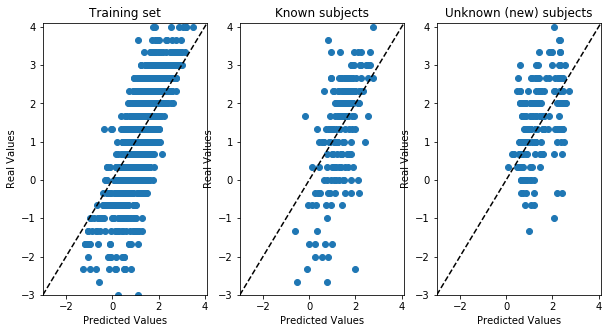

In [267]:
plot_res_vs_real(model_xgb)

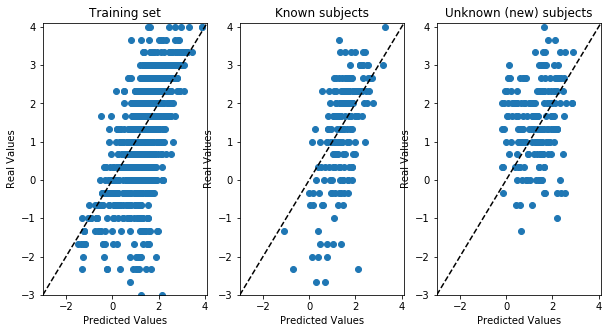

In [268]:
plot_res_vs_real(model_svm_optimized)

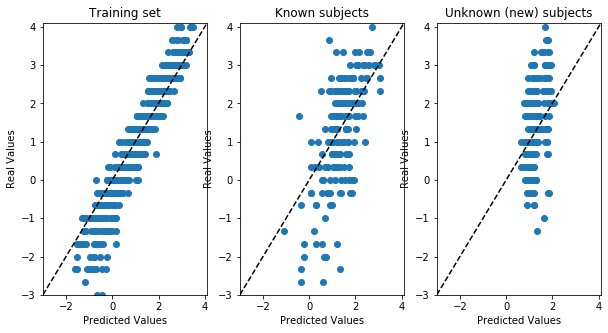

In [269]:
plot_res_vs_real(rf_optimized)

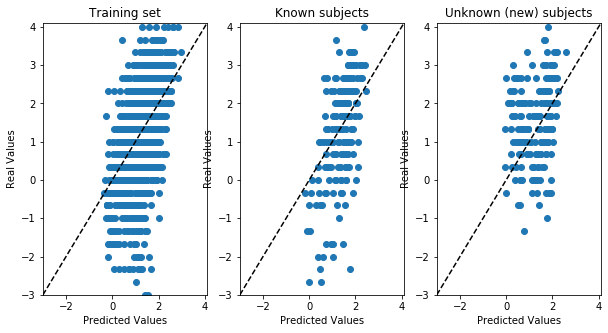

In [271]:
plot_res_vs_real(model_bayesian_ridge)

# Conclusions

XG Boosting, Random Forest, MERF, SVM and Bayes Ridge seems to be the best to predict `Unknown` data. 

Nevertheless, the performance is not good.
We should train with a fully Nested CV on the new data (adding features and comapring with the average response)

#  Converting predicted values into binary states

In [274]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,confusion_matrix,\
                            roc_auc_score, roc_curve,precision_recall_curve,precision_score,\
                            recall_score, accuracy_score, f1_score

def to_category (series_original):
    '''
    Transform the predicted value into a binary class
    1 = sad
    0 = happy
    '''
    series = series_original.copy()
    series[series_original >= 0] = 0 #happy is  0
    series[series_original < 0] = 1  #sad is 1
    return series

def conf_mat_rate(predict, real):
    '''
    Nice conf matrix
    '''

    tn, fp, fn, tp = confusion_matrix(predict, real).ravel()
    conf = pd.DataFrame(index= ['+','-', 'Total real'], columns= ['POS' , 'NEG'] , data = np.array([[tp,fn],[fp,tn],[1,1]]))
    conf.insert(2, 'Total predicted', np.array([tp+fn,fp+tn,0]))
    conf.iloc[0,0:2] = conf.iloc[0,0:2]/conf.iloc[0,2] # I calculate the rates
    conf.iloc[1,0:2] = conf.iloc[1,0:2]/conf.iloc[1,2]
    conf.iloc[2,:] = np.array([tp+fp,fn+tn,tp+fn+fp+tn]).astype(str) # I calculate the total real observations
    conf.iloc[2,:] = conf.iloc[2,:].astype(int) #formatting to integer
    return conf

def binary_class(model, dfs = None):
    '''
    Generate several metrics
    dfs : list of tuples. (X,y,name of DF)
    '''
    from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve,precision_recall_curve,precision_score, recall_score, accuracy_score, f1_score
    
    #in this case I am testing with several DF only to check. In the final stage I would like to do a NestedCV
    if dfs is None:
        dfs = [(X_train_scaled,y_train,'Training set'),
           (X_known_test_scaled,y_test_know,'Known subjects'),
           (X_unknown_test_scaled, y_test_unknow, 'Unknown (new) subjects')]
    all_values = {}
    for df in dfs:
        #df[0] -> X
        #df[1] -> y
        pred = to_category(model.predict(df[0]))
        real = to_category(df[1])
        cf = confusion_matrix(pred,real)
        cf_rate = conf_mat_rate(pred,real)
        
        metrics = {} #metric dictionary
        metrics_names = ['recall','precision','accuracy','f1']
        recall = recall_score(pred,real) #sensitivity
        precision = precision_score(pred,real)
        accuracy = accuracy_score(pred,real)
        f1 = f1_score(pred,real)
        for m in metrics_names:
            metrics[m] = eval(m)
        #append all
        all_values[df[2]] = [cf , cf_rate, metrics]
    return all_values

def metric_table (all_values, name_df, model_name):
    metric_df = pd.DataFrame(all_values[name_df][2], index=[model_name])
    return metric_df

def all_models_scores (models , models_names, name_df):
    '''
    one table per test df
    models : list
    models_name : list
    name_df : string
    '''
    metrics_names = ['recall','precision','accuracy','f1']
    df = pd.DataFrame(index = models_names, columns= metrics_names)
    
    for mod,name in zip(models, models_names):
        all_vals = binary_class(mod)
        df.loc[name,:] = metric_table(all_vals, name_df, model_name=name).values
    return df

Unknown (new) subjects

In [275]:
all_models_scores(models=[model_svm_optimized, model_xgb, rf_optimized, model_bayesian_ridge],
                  models_names=['model_svm_optimized','model_xgb','rf_optimized','model_bayesian_ridge'],
                  name_df= 'Unknown (new) subjects'
                 )

C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


,recall,precision,accuracy,f1
model_svm_optimized,0.125,0.0909091,0.912371,0.105263
model_xgb,0,0,0.943299,0
rf_optimized,0,0,0.943299,0
model_bayesian_ridge,0,0,0.93299,0


Known subjects

In [276]:
all_models_scores(models=[model_svm_optimized, model_xgb, rf_optimized, model_bayesian_ridge],
                  models_names=['model_svm_optimized','model_xgb','rf_optimized','model_bayesian_ridge'],
                  name_df= 'Known subjects'
                 )

C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


,recall,precision,accuracy,f1
model_svm_optimized,1,0.1,0.865672,0.181818
model_xgb,0.8,0.133333,0.865672,0.228571
rf_optimized,0.857143,0.2,0.875622,0.324324
model_bayesian_ridge,1,0.1,0.865672,0.181818


So far we can see that the `Unknown` test DF is not very good. It has only 11 negative cases over 194 (a ratio of 0.056) so, only 5.6 % of cases are sad. 

We should move to a CV by subjects

-------------------------

# CV  

I need to rebuild my DF in order to cross validate leaving subjects out

In [278]:
X = DF_complete_nona.copy()

In [279]:
cols_drop = ['la_p',	'ha_p',	'ha_n',	'la_n',	'la',	'p',	'n',	'ha',
              'start_survey','survey_no','experiment', 'VALENCE', 'Date_only_date', 'Subject', 'Date', 
             'start_survey_30m_ahead', 'start_survey_1h_ahead',	'start_survey_3h_ahead', 'start_survey_5m_ahead', 'start_survey_10m_ahead']

In [280]:
X.drop(columns =cols_drop, inplace= True)
X.reset_index(inplace= True, drop = True)

In [281]:
X

,subject,VALENCE_mean,HAN_actual,HAN_ideal,HAP_actual,HAP_ideal,HA_actual,HA_ideal,LAN_actual,LAN_ideal,LAP_actual,LAP_ideal,LA_actual,LA_ideal,N_actual,N_ideal,P_actual,P_ideal,Age,Children,Household_income,BMI,BAS_D,BAS_FS,BAS_RR,BIS.5,BIS_total,NS_total,Conscientiousness_scaled,Extraversion_scaled,Neuroticism_scaled,SWLS,FTP,SBQ,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Sex_Female,Sex_Male,Ethnicity_Asian,Ethnicity_Biracial,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Hispanic/Caucasian,Ethnicity_Hispanic/Other,Ethnicity_More than 1 race,Ethnicity_Native Hawaiian/Pacific Islander,Ethnicity_White,Ethnicity_White/Pacific Islander,Marital_Status_Divorced,Marital_Status_Engaged,Marital_Status_Living with partner,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Period_of_day_Evening,Period_of_day_Morning,Period_of_day_Night,step_max,step_min,step_median,steps_max_3h,steps_min_3h,steps_mean_3h,steps_var_3h,steps_median_3h,move_rate_3h,active_rate_3h,very_active_rate_3h,running_rate_3h,steps_max_1h,steps_min_1h,steps_mean_1h,steps_var_1h,steps_median_1h,move_rate_1h,active_rate_1h,very_active_rate_1h,running_rate_1h,steps_max_30m,steps_min_30m,steps_mean_30m,steps_var_30m,steps_median_30m,move_rate_30m,active_rate_30m,very_active_rate_30m,running_rate_30m,steps_max_10m,steps_min_10m,steps_mean_10m,steps_var_10m,steps_median_10m,move_rate_10m,active_rate_10m,very_active_rate_10m,running_rate_10m,steps_max_5m,steps_min_5m,steps_mean_5m,steps_var_5m,steps_median_5m,move_rate_5m,active_rate_5m,very_active_rate_5m,running_rate_5m,hr_max,hr_min,hr_med,SDNN_3h,pHR2_3h,rMSSD_3h,low_hr_3h,high_hr_3h,l_h_3h,CR_3h,hr_mean_3h,hr_var_3h,hr_std_3h,hr_median_3h,hr_rest_rate_3h,hr_moderate_rate_3h,hr_very_active_rate_3h,SDNN_1h,pHR2_1h,rMSSD_1h,low_hr_1h,high_hr_1h,l_h_1h,CR_1h,hr_mean_1h,hr_var_1h,hr_std_1h,hr_median_1h,hr_rest_rate_1h,hr_moderate_rate_1h,hr_very_active_rate_1h,SDNN_30m,pHR2_30m,rMSSD_30m,low_hr_30m,high_hr_30m,l_h_30m,CR_30m,hr_mean_30m,hr_var_30m,hr_std_30m,hr_median_30m,hr_rest_rate_30m,hr_moderate_rate_30m,hr_very_active_rate_30m,SDNN_10m,pHR2_10m,rMSSD_10m,low_hr_10m,high_hr_10m,l_h_10m,CR_10m,hr_mean_10m,hr_var_10m,hr_std_10m,hr_median_10m,hr_rest_rate_10m,hr_moderate_rate_10m,hr_very_active_rate_10m,SDNN_5m,pHR2_5m,rMSSD_5m,low_hr_5m,high_hr_5m,l_h_5m,CR_5m,hr_mean_5m,hr_var_5m,hr_std_5m,hr_median_5m,hr_rest_rate_5m,hr_moderate_rate_5m,hr_very_active_rate_5m,hr_0,hr_0.3,hr_0.5,hr_0.8,hr_1
0,1047,2.666667,1.333333,1.0,2.6,2.8,2.000000,2.333333,1.666667,1.000000,3.6,4.2,2.0,1.8,1.0,1.000000,4.333333,4.333333,43.0,3.0,9.0,27.328927,14.0,16.0,23.0,24.0,51.0,11.0,0.875,0.583333,0.208333,25.0,5.5,60.0,147.0,10.0,6.0,157.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,110.0,0.0,0.0,110.0,0.0,4.311111,209.813284,0.0,0.155556,0.100000,0.066667,0.044444,76.0,0.0,2.216667,133.325141,0.0,0.050000,0.033333,0.033333,0.033333,76.0,0.0,4.133333,260.947126,0.0,0.066667,0.066667,0.066667,0.066667,76.0,0.0,12.4,726.933333,0.0,0.2,0.2,0.2,0.2,76.0,0.0,24.8,1251.2,0.0,0.4,0.4,0.4,0.4,127.0,63.0,85.0,0.001523,0.151828,2.057286,63.0,114.0,0.552632,0.897638,79.605805,107.223097,10.354859,77.0,0.555243,0.179775,0.081461,0.000918,0.123077,1.950937,64.0,99.0,0.646465,0.779528,76.411043,31.498216,5.612327,76.0,0.690184,0.070552,0.000000,0.000943,0.140244,1.844570,69.0,99.0,0.696970,0.779528,78.654545,37.800665,6.148225,77.0,0.539394,0.121212,0.000000,0.001125,0.186441,1.978700,71.0,99.0,0.717172,0.779528,81.916667,61.806497,7.861711,80.0,0.316667,0.233333,0.000000,0.001094,0.125000,1.968502,76.0,99.0,0.767677,0.779528,85.757576,68.189394,8.257687,82.0,0.181818,0.424242,0.000000,63.0,77.0,85.0,99.0,127.0
1,1047,1.000000,1.333333,1.0,2.6,2.8,2.000000,2.333333,1.666667,1.000000,3.6,4.2,2.0,1.8,1.0,1.000000,4.333333,4.333333,43.0,3.0,9.0,27.328927,14.0,16.0,23.0,24.0,51.0,11.0,0.875,0.583333,0.208333,25.0,5.5,60.0,317.0,40.0,17.0,357.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,111.0,0.0,0.0,70.0,0.0,1.205556,60.074829,

In [282]:
y = X['VALENCE_mean'].copy()

In [283]:
y_median_subject = X.groupby(by='subject').median()['VALENCE_mean']
y_median_subject

subject
1002      3.000000
1004      0.500000
1008      1.000000
1009      2.333333
1014      2.666667
            ...   
DND111    2.000000
DND113    2.666667
DND114    1.333333
DND115    1.833333
DND119    2.333333
Name: VALENCE_mean, Length: 97, dtype: float64

In [284]:
#Creating a column with the valence reported - the median valence reported
X['Median_subject_valence'] = X['VALENCE_mean'].copy()
#substracting to each subject their own median
for subj in y_median_subject.index:
    X.loc[X.subject == subj,'Median_subject_valence'] = X.loc[X.subject == subj,'Median_subject_valence'].apply(lambda x: x - y_median_subject[subj])

y_median = X['Median_subject_valence'].astype(float).round(3)

In [285]:
subjects = X['subject'].copy() #let's store a copy of the subjects
X.drop(columns= ['VALENCE_mean', 'Median_subject_valence','subject'], inplace= True)
# I could drop this columns [hr_0	hr_0.3	hr_0.5	hr_0.8	hr_1]

In [286]:
for i in ['X','y','y_median','subjects','DF_complete_nona']:
    with open(f'./{i}.pickle', 'wb') as file:
        pickle.dump(eval(i),file)

### Runnig CV by Groups 

In [287]:
#Let's split by group/subject in order to train with different subjects than test
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=10, train_size=.7, random_state=7)

In [288]:
def group_shuffle(model,X,y, gss):
    '''
    Function performs a group shuffle CV
    '''
    n = 0
    df = pd.DataFrame(columns = ['Test set',	'MAE',	'MSE',	'RMSE'])

    #Loop to train all the different combinations
    for train_idx, test_idx in gss.split(X, y, subjects):
        n += 1
        SCALER = preprocessing.StandardScaler().fit(X.iloc[train_idx,:]) # I would SCALE the data, but to dont contaminate the Fold I should scale using the training for every fold
        train = pd.DataFrame(data = SCALER.transform(X.iloc[train_idx,:]), columns = X.columns) # Apply scaler to train data
        test = pd.DataFrame(data = SCALER.transform(X.iloc[test_idx,:]), columns = X.columns) # Apply scaler to test data
        model.fit(train, y.iloc[train_idx])
        df= df.append( evaluate(model,
                                 test_set_name=[f'Set {n}'],
                                 x_test = [test],
                                 y_test= [y.iloc[test_idx]]
                               )
                        )
    return df

## Testing the models

In [289]:
rf_metrics = group_shuffle(rf_optimized,X,y, gss)

In [290]:
rf_metrics.mean()

MAE     0.859302
MSE     1.216094
RMSE    1.101915
dtype: float64

In [291]:
rf_median_metrics = group_shuffle(rf_optimized,X,y_median, gss)

In [292]:
rf_median_metrics.mean()

MAE     0.715397
MSE     0.892019
RMSE    0.943668
dtype: float64

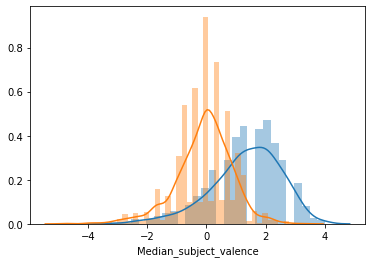

In [293]:
#Comparing both distributions
sns.distplot(y)
sns.distplot(y_median)

In [294]:
y.describe()

count    2017.000000
mean        1.342588
std         1.192099
min        -3.333333
25%         0.666667
50%         1.333333
75%         2.333333
max         4.000000
Name: VALENCE_mean, dtype: float64

In [295]:
y_median.describe()

count    2017.000000
mean       -0.075040
std         0.950234
min        -4.833000
25%        -0.667000
50%         0.000000
75%         0.500000
max         3.333000
Name: Median_subject_valence, dtype: float64

### How we compare the RMSE between this two different distributions?

Maybe the best solution to this is binarize the target variable and compare using classification metrics

### SVM


In [296]:
svm_metrics = group_shuffle(model_svm_optimized,X,y, gss)
svm_median_metrics = group_shuffle(model_svm_optimized,X,y_median, gss)

In [297]:
svm_metrics.mean()

MAE     0.933741
MSE     1.467727
RMSE    1.209467
dtype: float64

In [298]:
svm_median_metrics.mean()

MAE     0.745145
MSE     0.964165
RMSE    0.981152
dtype: float64

### XGBoost

In [299]:
xgb_metrics = group_shuffle(model_xgb,X,y, gss)
xgb_median_metrics = group_shuffle(model_xgb,X,y_median, gss)

In [300]:
xgb_metrics.mean()

MAE     0.884350
MSE     1.282147
RMSE    1.131525
dtype: float64

In [301]:
xgb_median_metrics.mean()

MAE     0.737599
MSE     0.941949
RMSE    0.969884
dtype: float64

### Bayesian Ridge

In [302]:
bayesian_metrics = group_shuffle(model_bayesian_ridge,X,y, gss)
bayesian_median_metrics = group_shuffle(model_bayesian_ridge,X,y_median, gss)

In [303]:
bayesian_metrics.mean()

MAE     0.943658
MSE     1.504620
RMSE    1.224004
dtype: float64

In [304]:
bayesian_median_metrics.mean()

MAE     0.701709
MSE     0.864653
RMSE    0.929102
dtype: float64

# Random Forest is the winner for `Valence`
> RMSE = 1.101

# Bayesian Ridge Regression is the winner for `Median_subject_valence`

> RMSE = 0.929